

### Bharath Bommeeshwar Kumar (D22012)


In [746]:
# Importing all the useful libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics as mat
import pickle 
import warnings
warnings.filterwarnings("ignore")
import nltk
from collections import Counter
from gensim.models import KeyedVectors
# scale the data
from sklearn.preprocessing import StandardScaler
# split the data
from sklearn.model_selection import train_test_split
# cross validation - grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#logistic regression
from sklearn.linear_model import LogisticRegression
#linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#knn neighbour model
from sklearn.neighbors import KNeighborsClassifier
#decision tree model
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
#adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
#calculate model performance
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

#xgboosting
from xgboost import XGBClassifier
import xgboost as xgb 

#for cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#measure accuracy of predictions
from sklearn import metrics
#to get complete classification report
from sklearn.metrics import classification_report


## PROBLEM: 

The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS-tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

## OBJECTIVE - To develop a SMS Spam Filter by classifying spam / ham messages 

## 1) Reading the Data

In [14]:
# Changing the pandas settings 

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

#pd.reset_option('all') # To bring back default options back

In [15]:
# Corpus

corpus=pd.read_excel("corpusfile.xlsx")
corpus

,SMS,Labels
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
...,...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",spam
5568,Will ü b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other suggestions?",ham
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,ham


In [16]:
# Initial insight 

corpus.Labels.value_counts()   # Imbalanced dataset

ham     4825
spam    747 
Name: Labels, dtype: int64

<AxesSubplot:xlabel='Labels', ylabel='count'>

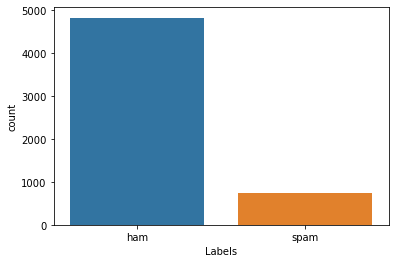

In [354]:
# Countplot

sns.countplot(corpus.Labels)

## 2) Text Pre-processing

## METHODOLOGY: 

1) Converting text into lower cases

2) Removing stopwords 

3) Removing white spaces

4) Stemming

In [17]:
# COnverting all the documents to string format for processing

corpus['SMS']=corpus['SMS'].astype(str)

In [18]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
for i in range(len(corpus.SMS)):
    #if type(corpus.SMS[i])!=int:

#1) Converting the text into lower cases
    
        corpus.SMS[i]=str(corpus.SMS[i]).lower()
    
#2)Removing stopwords from all the SMS
    
        corpus.SMS[i]=" ".join([w for w in corpus.SMS[i].split() if w not in stop_words])

    
#3) Removing white spaces from all SMS
    
        corpus.SMS[i] = corpus.SMS[i].replace("  ", " ").strip()
    
#4) Stemming of words
        corpus.SMS[i] = " ".join([ps.stem(w) for w in corpus.SMS[i].split()])
    
corpus


,SMS,Labels
0,"go jurong point, crazy.. avail bugi n great world la e buffet... cine got amor wat...",ham
1,ok lar... joke wif u oni...,ham
2,free entri 2 wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question(std txt rate)t&c' appli 08452810075over18',spam
3,u dun say earli hor... u c alreadi say...,ham
4,"nah think goe usf, live around though",ham
...,...,...
5567,"2nd time tri 2 contact u. u £750 pound prize. 2 claim easy, call 087187272008 now1! 10p per minute. bt-national-rate.",spam
5568,ü b go esplanad fr home?,ham
5569,"pity, * mood that. so...ani suggestions?",ham
5570,guy bitch act like i'd interest buy someth els next week gave us free,ham


In [20]:
spam_corpus=corpus[corpus['Labels']=='spam']
ham_corpus=corpus[corpus['Labels']=='ham']

In [21]:
spam_corpus.sample(10)

,SMS,Labels
5427,santa calling! would littl one like call santa xma eve? call 09058094583 book time.,spam
2915,sorry! u unsubscrib yet. mob offer packag min term 54 weeks> pl resubmit request expiry. repli themob help 4 info,spam
2729,urgent pleas call 09066612661 landline. £5000 cash luxuri 4* canari island holiday await collection. t&c sae award. 20m12aq. 150ppm. 16+ “,spam
4091,tri call repli sm video mobil 750 min unlimit text + free camcord repli call 08000930705,spam
3433,camera - award sipix digit camera! call 09061221066 fromm landline. deliveri within 28 days.,spam
2612,knock knock txt whose 80082 enter r weekli draw 4 £250 gift voucher 4 store yr choice. t&c www.tkls.com age16 stoptxtstop£1.50/week,spam
1137,dont forget place mani free request 1stchoice.co.uk wish. inform call 08707808226.,spam
2079,85233 free>ringtone!repli real,spam
1456,summer final here! fanci chat flirt sexi singl yr area? get match repli summer now. free 2 join. optout txt stop help08714742804,spam
2352,"download mani rington u like restrictions, 1000 2 choose. u even send 2 yr buddys. txt sir 80082 £3",spam


## 3) Data Exploration

### Word Cloud

In [22]:
#Spam and ham messages

spams=""
hams=""

for i in range(corpus.shape[0]):
    
    if corpus.Labels[i]=='spam':         
        spams+=corpus.SMS[i]
    else:
        hams+=corpus.SMS[i]

## Ham

In [352]:
words = corpus[corpus.Labels=='ham'].SMS.apply(lambda x: [word.lower() for word in str(x).split()])
ham_words = Counter() #

for msg in words:
    ham_words.update(msg)

print("Common words in ham and occurence counts:\n")
print(ham_words.most_common(10))

Common words in ham and occurence counts:

[('u', 881), ('go', 395), ("i'm", 369), ('get', 348), ('2', 288), ('&lt;#&gt;', 276), ('come', 274), ('call', 271), ('ur', 241), ('like', 236)]


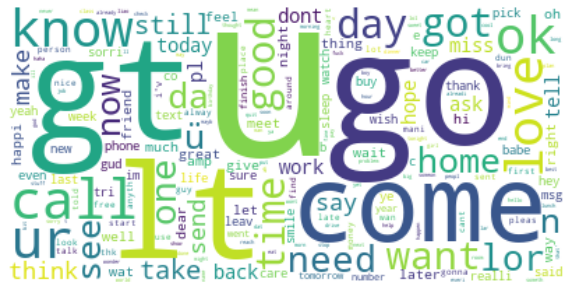

<Figure size 432x288 with 0 Axes>

In [318]:
#Wordcloud for ham messages

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(hams)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#plt.savefig("Wordcloud-HAM.jpeg")

## Spam

In [353]:
words = corpus[corpus.Labels=='spam'].SMS.apply(lambda x: [word.lower() for word in x.split()])
spam_counter = Counter()

for msg in words:
    spam_counter.update(msg)

print("Common words in spam and occurence counts:\n")
print(spam_counter.most_common(10))

Common words in spam and occurence counts:

[('call', 355), ('free', 180), ('2', 169), ('txt', 145), ('ur', 144), ('text', 128), ('mobil', 119), ('u', 117), ('repli', 109), ('claim', 108)]


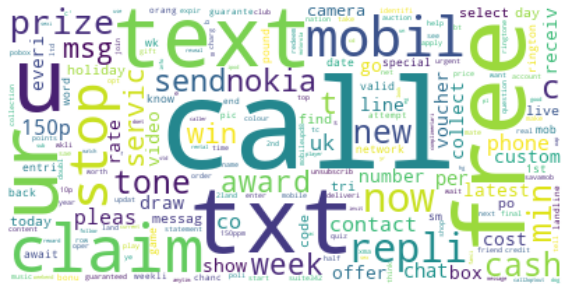

<Figure size 432x288 with 0 Axes>

In [319]:
#Wordcloud for spam messages

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spams)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#plt.savefig("Wordcloud-SPAM.jpeg")

## Steps 4-6 : Vectorization, Dimension reduction and building classifiction models

## TF vectorization

### Document-Term Matrix

#### 1. Get the Bag-Of-Words (BOW) Dataframe

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
#using count vectoroizer to create a document-term matrix

cv = CountVectorizer()
X = cv.fit_transform(corpus.SMS)
vector_array=X.toarray()

In [29]:
# The vector form

vector_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
# The words list

names=cv.get_feature_names()
names

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [31]:
#Converting the document-term matrix to a dataframe

DTM = pd.DataFrame(data=vector_array,columns = names)
DTM

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2. Dimension Reduction

### Approach 1 - Dropping texts that appear in less than 0.5% of the documents

In [32]:
#Remove terms that is contained in less than 0.5% of the documents

DTM.apply(lambda x: np.sum(x)/len(x), axis=0)


00              0.001795
000             0.005205
000pes          0.000179
008704050406    0.000359
0089            0.000179
                  ...   
zouk            0.000179
zyada           0.000179
èn              0.000179
ú1              0.000179
〨ud             0.000179
Length: 8238, dtype: float64

In [33]:
DTM=pd.read_csv('TF_DTM_0.5%.csv')
DTM

,000,10,100,1000,150p,150ppm,16,18,1st,2nd,...,xxx,ya,ye,yeah,year,yes,yet,yo,you,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
corpus_binary=corpus.copy()

#Label encoding target class
corpus_binary["Labels"] = corpus_binary["Labels"].replace({"ham":0,"spam":1})
corpus_binary

,SMS,Labels
0,"go jurong point, crazy.. avail bugi n great world la e buffet... cine got amor wat...",0
1,ok lar... joke wif u oni...,0
2,free entri 2 wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question(std txt rate)t&c' appli 08452810075over18',1
3,u dun say earli hor... u c alreadi say...,0
4,"nah think goe usf, live around though",0
...,...,...
5567,"2nd time tri 2 contact u. u £750 pound prize. 2 claim easy, call 087187272008 now1! 10p per minute. bt-national-rate.",1
5568,ü b go esplanad fr home?,0
5569,"pity, * mood that. so...ani suggestions?",0
5570,guy bitch act like i'd interest buy someth els next week gave us free,0


In [89]:
data_final = pd.concat([DTM,corpus_binary["Labels"]],axis=1)

X = data_final.drop(["Labels"],axis=1)
y = data_final["Labels"]

In [90]:
X.head(2)

,000,10,100,1000,150p,150ppm,16,18,1st,2nd,...,xxx,ya,ye,yeah,year,yes,yet,yo,you,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Labels, Length: 5572, dtype: int64

In [92]:
#Splitting the data TRAIN TEST

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [93]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC 

In [94]:
#models with default parameter

lr_1 = LogisticRegression()
rf_1 = RandomForestClassifier()               #random forest
ab_1 = AdaBoostClassifier()                   #adaboost
gb_1 = GradientBoostingClassifier()           #gradientboost
xgb_1 = XGBClassifier()                       #xgboost classifier
knn_1 = KNeighborsClassifier()                #knn classifier
ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
svm_1 = SVC()                                 #support vector machines_classifier
mnb_1 = MultinomialNB()                       #multinomial naive bayes
bnb_1 = BernoulliNB()                         #bernoulli naive bayes

#### <u> Model performance with Default parameters

In [95]:
#!pip uninstall jinja2
#!sudo pip install jinja2

In [96]:
# default model performance on test data
import time
start = time.time()

L = [lr_1,rf_1,ab_1,gb_1,xgb_1,knn_1,ldm_1,svm_1,mnb_1,bnb_1] # List of models

acc_1 = []
f_1 = []
auroc_1 = []
recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    acc = mat.accuracy_score(y_test,pred)
    acc_1.append(acc)
    
    f1 = mat.f1_score(y_test,pred)
    f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_test,pred)
    auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_test,pred)
    recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":acc_1,"f1_score":f_1,"auroc":auroc_1,"recall_score":recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","XtraGradientBoosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier",
                                    "MultinomialNaiveBayes","BernoulliNaiveBayes"])
df1_def_model
#df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

________________________________________
timetaken: 0.37131654818852744 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.974888,0.899281,0.917393,0.838926
RandomForest,0.971300,0.886525,0.915322,0.838926
AdaptiveBoosting,0.968610,0.873646,0.902417,0.812081
Gradient_Boosting,0.965022,0.853933,0.880480,0.765101
XtraGradientBoosting,0.975785,0.905263,0.929263,0.865772
KNeighourestNeighbour,0.933632,0.672566,0.754516,0.510067
LinearDiscriminantClassifier,0.969507,0.876812,0.902935,0.812081
SupportVectorclassifier,0.973094,0.888060,0.899329,0.798658
MultinomialNaiveBayes,0.977578,0.915825,0.950165,0.912752
BernoulliNaiveBayes,0.979372,0.917563,0.928495,0.859060


* <b> Since the data is unbalanced we use f1 score as our comparative metrics and choosing the 5 best models which performed well with its default parameters and optimizing it to improve its performance further.

#### <u> Hyperparameter tuning to find the best parameters

#### <font color= BLUE>1.RANDOM FOREST  

#### Choosing best parameters

In [98]:
start = time.time()

rf_1 = RandomForestClassifier()

params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.5)]}

rf_2 = RandomizedSearchCV(estimator=rf_1, param_distributions=params,n_iter=50,cv=5)
rf_2.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

rf_2.best_params_

timetaken: 2.1225173989931743 min


{'class_weight': {0: 1.0, 1: 1}}

#### Model testing with best parameters

In [100]:
rf_2 = RandomForestClassifier(class_weight = {0: 1.0, 1: 1},random_state=42)
rf_2.fit(X_train,y_train) 

RandomForestClassifier(class_weight={0: 1.0, 1: 1}, random_state=42)

In [101]:
#Prediction on test data
y_pred = rf_2.predict(X_test)

In [102]:
#accuracy score
rf_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",rf_acc_2)

#f1 score
rf_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",rf_f1_2)

#auroc score
rf_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",rf_auroc_2)

#recall
rf_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",rf_recall_score_2)

#print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9704035874439462
F1 Score: 0.8842105263157894
Auroc: 0.9176428085094557
Recall 0.8590604026845637
[[956  10]
 [ 23 126]]


# .................................................................................................................................

#### <font color= BLUE> 2.XG BOOSTING

#### Choosing best parameters

#### Model testing with best parameters

In [105]:
#fitting the model with best parameter
xgb_cv = XGBClassifier(subsample= 0.90, n_estimators= 500, max_depth= 19, colsample_bytree= 0.80,random_state=42)
xgb_cv.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=19, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [106]:
#Prediction on test data with best parameters
y_pred = xgb_cv.predict(X_test)

In [107]:
#accuracy score
xgb_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",xgb_acc_2)

xgb_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",xgb_f1_2)

xgb_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",xgb_auroc_2)

#recall
xgb_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",xgb_recall_score_2)

#print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9757847533632287
F1 Score: 0.9059233449477352
Auroc: 0.9321008239887726
Recall 0.8590604026845637
[[958   8]
 [ 19 130]]


# .................................................................................................................................

#### <font color= BLUE> 3. SUPPORT VECTOR CLASSIFIER

#### Choosing best parameters

In [108]:
#Finding the best parameter
start = time.time()

#defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
svc_cv = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
#fitting the model for grid search
svc_cv.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",svc_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.865 total time=   2.1s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.865 total time=   2.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.866 total time=   2.1s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.866 total time=   2.1s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.865 total time=   2.3s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.981 total time=   1.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.982 total time=   1.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.982 total time=   1.1s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.975 total time=   0.9s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.973 total time=   0.9s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.978 total time=   1.6s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;

#### Model testing with best parameters

In [109]:
#fitting the model with best parameter
svc_cv = SVC(kernel = 'rbf', gamma = 0.1, C = 10)
svc_cv.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [110]:
#Prediction on test data with best parameters
y_pred = svc_cv.predict(X_test)

In [111]:
#accuracy score
svc_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",svc_acc_2)

svc_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",svc_f1_2)

svc_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",svc_auroc_2)

#recall
svc_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",svc_recall_score_2)

#print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9766816143497757
F1 Score: 0.9071428571428571
Auroc: 0.9241041032695542
Recall 0.8590604026845637
[[962   4]
 [ 22 127]]


# .................................................................................................................................

#### <font color= BLUE> 4. MULTINOMIAL NAIVE BAYES

* The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However,in practice, fractional counts such as tf-idf may also work.

#### Choosing best parameters

In [112]:
#Finding the best parameter
start = time.time()

#defining parameter range
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_grid_NB = {'alpha': alphas, 'fit_prior' : [True, False]}                     #, 'class_prior ' : [None, [.1,.9],[.2, .8]]}

mnb_1 = MultinomialNB() 

#fitting the model for grid search
multi_nb = RandomizedSearchCV(estimator = mnb_1, param_distributions = p_grid_NB, scoring = 'f1',n_iter=50, cv = 5)
multi_nb.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

print("Best Parameters:",multi_nb.best_params_)

timetaken: 0.07 min
Best Parameters: {'fit_prior': True, 'alpha': 0.5}


#### Model testing with best parameters

In [113]:
#fitting the model with best parameter
multi_nb = MultinomialNB(fit_prior= True, alpha= 0.8)
multi_nb.fit(X_train,y_train)

MultinomialNB(alpha=0.8)

In [114]:
#Prediction on test data with best parameters
y_pred = multi_nb.predict(X_test)

In [115]:
#accuracy score
mnb_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",mnb_acc_2)

mnb_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",mnb_f1_2)

mnb_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",mnb_auroc_2)

#recall
mnb_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",mnb_recall_score_2)

#print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9775784753363229
F1 Score: 0.9158249158249159
Auroc: 0.9501646588019509
Recall 0.8590604026845637
[[954  12]
 [ 13 136]]


# .................................................................................................................................

#### <font color= BLUE> 5.BERNOULLI NAIVE BAYES

* Naive Bayes classifier for multivariate Bernoulli models.Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts,BernoulliNB is designed for binary/boolean features.

#### Choosing best parameters

In [116]:
#Finding the best parameter
start = time.time()


#defining parameter range
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
b_grid_NB = {'alpha': alphas,'fit_prior': [True, False]}  #, 'class_prior ' : [None, [.1,.9],[.2, .8]]}

bnb_1 = BernoulliNB()

#fitting the model for grid search
b_nb = RandomizedSearchCV(estimator = bnb_1, param_distributions = b_grid_NB, scoring = 'f1',n_iter=50, cv = 5)
b_nb.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

print("Best Parameters:",b_nb.best_params_)

timetaken: 0.11 min
Best Parameters: {'fit_prior': True, 'alpha': 0.4}


#### Model testing with best parameters

In [117]:
#fitting the model with best parameter
b_nb = BernoulliNB(fit_prior= True, alpha= 1.0)
b_nb.fit(X_train,y_train)

BernoulliNB()

In [118]:
#Prediction on test data with best parameters
y_pred = b_nb.predict(X_test)

In [119]:
#accuracy score
bnb_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",bnb_acc_2)

bnb_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",bnb_f1_2)

bnb_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",bnb_auroc_2)

#recall
bnb_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",bnb_recall_score_2)

#print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.979372197309417
F1 Score: 0.9175627240143368
Auroc: 0.9284950046549113
Recall 0.8590604026845637
[[964   2]
 [ 21 128]]


In [132]:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')

indexes1 = ["LogisticRegression","RandomForest","AdaptiveBoosting","Gradient_Boosting","XtraGradientBoosting","KNeighourestNeighbour","LinearDiscriminantClassifier","SupportVectorclassifier","MultinomialNaiveBayes","BernoulliNaiveBayes"]
indexes2 = ["RandomForest","XtraGradientBoosting","SupportVectorclassifier","MultinomialNaiveBayes","BernoulliNaiveBayes"]

df1 = pd.DataFrame({"Accuracy":acc_1,"F1_score":f_1,"Auroc":auroc_1,"Recall":recall_1},index=indexes1)

df2 = pd.DataFrame({"Accuracy":[rf_acc_2,xgb_acc_2,svc_acc_2,mnb_acc_2,bnb_acc_2],
                    "F1_Score":[rf_f1_2,xgb_f1_2,svc_f1_2,mnb_f1_2,bnb_f1_2],
                    "Auroc":[rf_auroc_2,xgb_auroc_2,svc_auroc_2,mnb_auroc_2,bnb_auroc_2],
                   "Recall":[rf_recall_score_2,xgb_recall_score_2,svc_recall_score_2,mnb_recall_score_2,bnb_recall_score_2]},index=indexes2)


#df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on Test_data with default params")
#df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Best Model's Performance on Test_data with Optimized params")

#display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

df1          # Default paramters

,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.974888,0.899281,0.917393,0.838926
RandomForest,0.971300,0.886525,0.915322,0.838926
AdaptiveBoosting,0.968610,0.873646,0.902417,0.812081
Gradient_Boosting,0.965022,0.853933,0.880480,0.765101
XtraGradientBoosting,0.975785,0.905263,0.929263,0.865772
KNeighourestNeighbour,0.933632,0.672566,0.754516,0.510067
LinearDiscriminantClassifier,0.969507,0.876812,0.902935,0.812081
SupportVectorclassifier,0.973094,0.888060,0.899329,0.798658
MultinomialNaiveBayes,0.977578,0.915825,0.950165,0.912752
BernoulliNaiveBayes,0.979372,0.917563,0.928495,0.859060


In [134]:
df2  # Hyperparameter tuned for best 5 models - We can see some improvements after cross validation

,Accuracy,F1_Score,Auroc,Recall
RandomForest,0.970404,0.884211,0.917643,0.85906
XtraGradientBoosting,0.975785,0.905923,0.932101,0.85906
SupportVectorclassifier,0.976682,0.907143,0.924104,0.85906
MultinomialNaiveBayes,0.977578,0.915825,0.950165,0.85906
BernoulliNaiveBayes,0.979372,0.917563,0.928495,0.85906


## Approach 2 - Principal Component Analysis

### PCA on the above unscaled data of TF vectorization

In [336]:
# Applying PCA

from sklearn.decomposition import PCA

pca=PCA()
pca_comp=pca.fit_transform(DTM)
pca_tf=pd.DataFrame(pca_comp)
pca_tf

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,-0.094047,-0.281388,-0.052055,-0.216115,-0.130489,0.844647,0.258827,0.043690,0.025723,-0.211587,...,0.017245,-0.029386,-0.036563,-0.007447,0.018849,-0.032142,-0.009349,-0.015482,-0.000678,-0.010917
1,-0.100728,-0.202019,-0.097233,-0.029070,-0.286559,-0.031931,0.035914,-0.015158,0.167512,0.261928,...,-0.009870,-0.011255,-0.015749,-0.009565,-0.015141,0.001597,-0.004458,-0.008556,-0.000733,-0.017537
2,-0.113537,0.552693,0.374145,-0.650119,0.042225,-0.369146,0.397938,0.573902,-0.192845,0.116246,...,-0.396340,0.144940,0.175920,0.007636,0.087025,-0.258019,-0.058217,0.000442,-0.007464,0.016283
3,-0.047110,-0.205905,-0.082498,-0.008909,-0.112640,-0.055465,-0.043483,0.041303,-0.005837,0.027325,...,-0.006726,-0.015882,-0.005130,0.002947,-0.002823,-0.010505,0.007767,0.009303,0.002201,0.008145
4,-0.072324,-0.153397,-0.075156,0.005859,-0.107453,-0.117414,-0.001266,-0.001076,-0.044463,-0.062650,...,-0.004590,0.011667,-0.012481,-0.025595,0.002799,-0.001863,-0.031681,-0.005787,0.005777,-0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,-0.106445,1.076779,-0.514413,0.449851,-0.079737,0.143874,-0.171088,-0.197626,0.121471,-0.049684,...,-0.252367,0.142492,0.042953,-0.013947,-0.123243,0.099107,-0.002052,-0.009782,-0.007968,0.006807
5568,-0.106857,-0.251782,-0.106750,-0.268993,-0.150766,0.785400,0.244430,0.038888,0.034344,-0.210437,...,0.005178,-0.003938,0.001462,-0.000854,-0.008983,-0.001425,0.004067,0.002557,-0.000430,0.003093
5569,-0.069666,-0.160784,-0.111074,0.018512,-0.082344,-0.128167,-0.013073,0.022720,-0.027978,-0.036452,...,0.012067,-0.005039,0.012597,-0.044769,-0.014242,-0.002138,-0.023617,0.027433,-0.002305,0.001538
5570,-0.059862,0.197264,0.203042,-0.457086,0.089760,-0.176869,0.134351,0.240751,-0.287397,0.413016,...,0.013063,0.012426,-0.028273,-0.014539,0.025113,0.019241,-0.001086,-0.007958,-0.009002,-0.002978


In [337]:
pca_tf.shape

(5572, 360)

### Variance Proportion

In [338]:
pca.explained_variance_ratio_

array([0.04858917, 0.02715758, 0.02326105, 0.01776668, 0.01638169,
       0.01588366, 0.01436185, 0.0132575 , 0.01189606, 0.01086027,
       0.0103628 , 0.00989306, 0.00952849, 0.00951745, 0.00917263,
       0.00896689, 0.00860007, 0.00849362, 0.00811902, 0.00803902,
       0.00797355, 0.00782103, 0.00764892, 0.00737205, 0.00715827,
       0.00699576, 0.00682921, 0.00667066, 0.00650194, 0.00639684,
       0.00619729, 0.00606418, 0.00596717, 0.00589206, 0.00585376,
       0.00574624, 0.00561326, 0.00559955, 0.00549179, 0.00541275,
       0.00533073, 0.00524419, 0.00520765, 0.00518148, 0.00513504,
       0.00509756, 0.00500073, 0.00489915, 0.00482681, 0.00476449,
       0.00474182, 0.00472222, 0.00467059, 0.00464753, 0.0045454 ,
       0.00449927, 0.00441909, 0.00440604, 0.00433942, 0.00431216,
       0.0042097 , 0.00416664, 0.00414468, 0.00412019, 0.00407937,
       0.00402063, 0.0039903 , 0.00394304, 0.00390654, 0.00382704,
       0.00381921, 0.00372127, 0.00370013, 0.0036706 , 0.00365

Text(0, 0.5, 'Variance ratio')

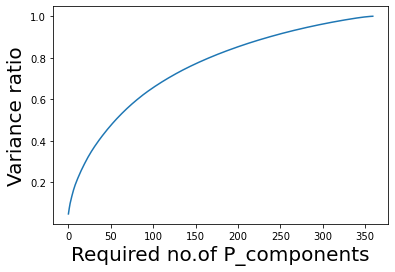

In [339]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Required no.of P_components",fontsize=20)
plt.ylabel("Variance ratio",fontsize=20)

In [39]:
np.cumsum(pca.explained_variance_ratio_)

array([0.04858917, 0.07574675, 0.0990078 , 0.11677448, 0.13315618,
       0.14903984, 0.16340169, 0.17665919, 0.18855525, 0.19941553,
       0.20977832, 0.21967138, 0.22919987, 0.23871732, 0.24788995,
       0.25685683, 0.2654569 , 0.27395052, 0.28206954, 0.29010856,
       0.29808211, 0.30590314, 0.31355207, 0.32092412, 0.32808239,
       0.33507815, 0.34190736, 0.34857802, 0.35507997, 0.3614768 ,
       0.36767409, 0.37373827, 0.37970544, 0.3855975 , 0.39145127,
       0.39719751, 0.40281077, 0.40841032, 0.41390211, 0.41931486,
       0.42464559, 0.42988978, 0.43509742, 0.4402789 , 0.44541394,
       0.45051151, 0.45551224, 0.46041138, 0.46523819, 0.47000268,
       0.4747445 , 0.47946672, 0.48413731, 0.48878484, 0.49333023,
       0.49782951, 0.5022486 , 0.50665464, 0.51099406, 0.51530622,
       0.51951592, 0.52368256, 0.52782724, 0.53194744, 0.5360268 ,
       0.54004743, 0.54403773, 0.54798077, 0.55188731, 0.55571435,
       0.55953356, 0.56325483, 0.56695497, 0.57062556, 0.57428

In [139]:
# 95 % variance explainability is our objective

np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)

74

In [140]:
# Count of variables that could explain 95% of the variance

variables=pca_tf.shape[1]-np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)
variables

286

### From the PCA, even without last 74 variables its possible around 95 % of the variance, we'll drop last 74 columns

In [141]:
# Dropping variables

p_pca_tf=pca_tf.iloc[:,0:variables]
p_pca_tf

,0,1,2,3,4,5,6,7,8,9,...,276,277,278,279,280,281,282,283,284,285
0,-0.094047,-0.281388,-0.052055,-0.216115,-0.130489,0.844647,0.258827,0.043690,0.025723,-0.211587,...,-0.013498,-0.000712,-0.007704,-0.062165,-0.012525,-0.008982,0.054617,-0.087315,0.065388,0.002185
1,-0.100728,-0.202019,-0.097233,-0.029070,-0.286559,-0.031931,0.035914,-0.015158,0.167512,0.261928,...,-0.016411,0.057540,-0.033557,-0.055629,-0.023094,-0.070517,0.027057,0.165744,-0.048706,-0.029877
2,-0.113537,0.552693,0.374145,-0.650119,0.042225,-0.369146,0.397938,0.573902,-0.192845,0.116246,...,-0.288363,0.062905,-0.110462,0.153047,-0.021000,-0.070417,0.041576,0.042740,-0.072761,0.006839
3,-0.047110,-0.205905,-0.082498,-0.008909,-0.112640,-0.055465,-0.043483,0.041303,-0.005837,0.027325,...,0.084316,-0.017716,0.213322,-0.034481,0.078100,-0.016449,-0.010683,0.017988,0.130855,0.006926
4,-0.072324,-0.153397,-0.075156,0.005859,-0.107453,-0.117414,-0.001266,-0.001076,-0.044463,-0.062650,...,-0.017668,-0.041943,-0.067038,0.001344,-0.011525,0.006257,0.044424,0.004321,-0.001557,-0.015647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,-0.106445,1.076779,-0.514413,0.449851,-0.079737,0.143874,-0.171088,-0.197626,0.121471,-0.049684,...,0.059249,-0.009837,-0.137575,0.191795,0.084854,-0.066189,-0.128870,-0.068450,0.026836,0.034066
5568,-0.106857,-0.251782,-0.106750,-0.268993,-0.150766,0.785400,0.244430,0.038888,0.034344,-0.210437,...,0.017991,0.002010,-0.014030,0.004808,-0.027255,0.016872,-0.003020,-0.022601,-0.015788,0.004983
5569,-0.069666,-0.160784,-0.111074,0.018512,-0.082344,-0.128167,-0.013073,0.022720,-0.027978,-0.036452,...,0.117999,0.074362,-0.044116,0.047182,-0.054298,-0.052330,0.007724,0.107783,-0.049872,-0.036983
5570,-0.059862,0.197264,0.203042,-0.457086,0.089760,-0.176869,0.134351,0.240751,-0.287397,0.413016,...,0.021261,-0.056915,0.038487,-0.010031,0.032095,0.091269,-0.039844,-0.043598,-0.026552,-0.040066


In [301]:
#p_pca_tf.to_csv("PCA_TF",index=False)

### Visualizing the word vectors using PCA

In [333]:
# We'll reduce columns

from sklearn.decomposition import PCA
pca=PCA(n_components=2)      # 2 principal components
principalComponents=pca.fit_transform(p_pca_tf)
principalDf=pd.DataFrame(data=principalComponents,columns=['PC1','PC2'],index=p_pca_tf.index)

In [334]:
principalDf['Label']=corpus['Labels']
principalDf

,PC1,PC2,Label
0,-0.094048,-0.280688,ham
1,-0.100726,-0.203556,ham
2,-0.113537,0.552696,spam
3,-0.047109,-0.205524,ham
4,-0.072324,-0.153383,ham
...,...,...,...
5567,-0.106443,1.076708,spam
5568,-0.106858,-0.251751,ham
5569,-0.069666,-0.160747,ham
5570,-0.059858,0.197460,ham


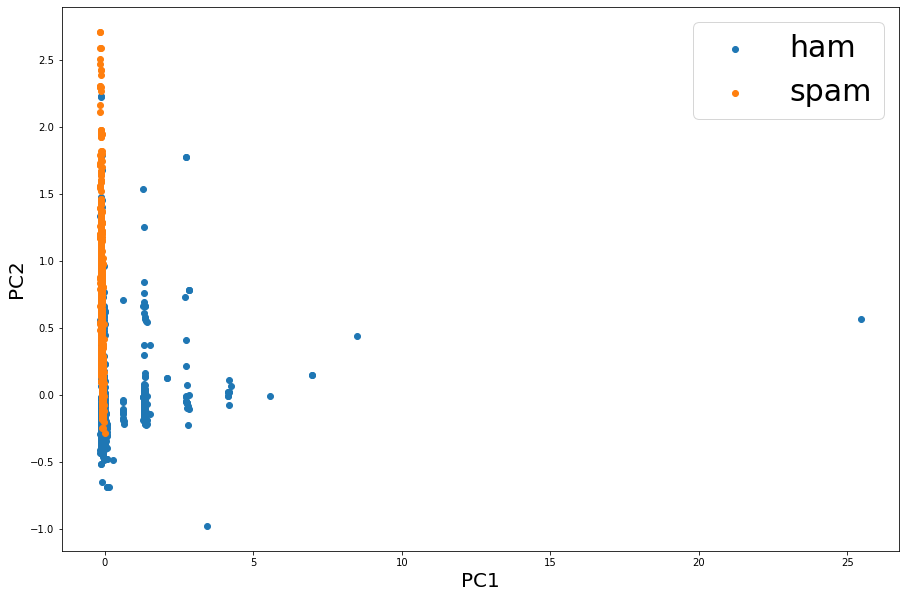

In [335]:
# Group the data by the Label
grouped = principalDf.groupby('Label')

plt.figure(figsize=(15,10))
# Plot each group as a separate scatter plot
for name, group in grouped:
    plt.scatter(group['PC1'], group['PC2'], label=name)

# Add a legend to the plot
plt.legend()

# Label the axes
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.legend(fontsize=30)
# Show the plot
plt.show()


In [142]:
data_final = pd.concat([p_pca_tf,corpus_binary["Labels"]],axis=1)

X = data_final.drop(["Labels"],axis=1)
y = data_final["Labels"]

In [143]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,276,277,278,279,280,281,282,283,284,285
0,-0.094047,-0.281388,-0.052055,-0.216115,-0.130489,0.844647,0.258827,0.043690,0.025723,-0.211587,...,-0.013498,-0.000712,-0.007704,-0.062165,-0.012525,-0.008982,0.054617,-0.087315,0.065388,0.002185
1,-0.100728,-0.202019,-0.097233,-0.029070,-0.286559,-0.031931,0.035914,-0.015158,0.167512,0.261928,...,-0.016411,0.057540,-0.033557,-0.055629,-0.023094,-0.070517,0.027057,0.165744,-0.048706,-0.029877


In [145]:
#Splitting the data TRAIN TEST

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [148]:
#models with default parameter

lr_1 = LogisticRegression()
rf_1 = RandomForestClassifier()               #random forest
ab_1 = AdaBoostClassifier()                   #adaboost
gb_1 = GradientBoostingClassifier()           #gradientboost
xgb_1 = XGBClassifier()                       #xgboost classifier
knn_1 = KNeighborsClassifier()                #knn classifier
ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
svm_1 = SVC()                                 #support vector machines_classifier
#mnb_1 = MultinomialNB()                       #multinomial naive bayes - Cannot be applied to PCA due to negative values
bnb_1 = BernoulliNB()                         #bernoulli naive bayes

#### <u> Model performance with Default parameters

In [149]:
# default model performance on test data
import time
start = time.time()

L = [lr_1,rf_1,ab_1,gb_1,xgb_1,knn_1,ldm_1,svm_1,bnb_1] # List of models

acc_1 = []
f_1 = []
auroc_1 = []
recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    acc = mat.accuracy_score(y_test,pred)
    acc_1.append(acc)
    
    f1 = mat.f1_score(y_test,pred)
    f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_test,pred)
    auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_test,pred)
    recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":acc_1,"f1_score":f_1,"auroc":auroc_1,"recall_score":recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","XtraGradientBoosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier",
                                    "BernoulliNaiveBayes"])
df1_def_model
#df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

________________________________________
timetaken: 1.9747183402379354 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.973991,0.895307,0.914037,0.832215
RandomForest,0.971300,0.880597,0.895456,0.791946
AdaptiveBoosting,0.960538,0.851351,0.911949,0.845638
Gradient_Boosting,0.969507,0.877698,0.905773,0.818792
XtraGradientBoosting,0.974888,0.900000,0.920231,0.845638
KNeighourestNeighbour,0.946188,0.750000,0.801496,0.604027
LinearDiscriminantClassifier,0.969507,0.876812,0.902935,0.812081
SupportVectorclassifier,0.973094,0.888060,0.899329,0.798658
BernoulliNaiveBayes,0.917489,0.719512,0.864400,0.791946


In [ ]:
# IN PCA data, XtraGradientBoosting is performing well but f1 score slightly dropped compared to original data

## TF-IDF vectorization

#### 1. Get the Bag-Of-Words (BOW) Dataframe with TF-IDF vectorizor

In [150]:
#TF-IDF vectorization for SMS column
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer()
tfidf_vectors=tfidf_vectorizer.fit_transform(corpus.SMS)         # Fit transform
names=tfidf_vectorizer.get_feature_names() # feature names

In [151]:
#Converting the above compressed object into numpy array

tfidf_vectors=tfidf_vectors.toarray()

#Converting the above array into data frame with proper column names
tfidf_vectors=pd.DataFrame(tfidf_vectors,columns=names)
tfidf_vectors

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2. Dimension Reduction

### Approach 1 
### Dropping texts that appear in less than 0.5% of the documents

In [ ]:
tfidf_vectors.to_csv("TFIDF_tfidf_0.5%.csv",index=False)

In [152]:
tfidf_vectors=pd.read_csv("TFIDF_tfidf_0.5%.csv")
tfidf_vectors

,ask,back,call,come,da,day,dear,dont,free,get,...,ur,wait,want,wat,way,week,well,work,yeah,you
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.189215,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.116013,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.121314,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.189906,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.218205,0.0,0.0,0.0,0.0


In [ ]:
## As only 70 columns were coming, we're reducing the threshold from 0.5 to 0.2 %

### Dropping texts that appear in less than 0.2% of the documents

In [153]:
tfidf_vec3=pd.read_csv("TFIDF_tfidf_0.2%.csv")
tfidf_vec3

,150p,50,again,ah,aight,alreadi,already,also,alway,amp,...,www,ya,ye,yeah,year,yes,yet,yo,you,yup
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.349907,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
data_final = pd.concat([tfidf_vec3,corpus_binary["Labels"]],axis=1)

X = data_final.drop(["Labels"],axis=1)
y = data_final["Labels"]

In [156]:
X.head(2)

,150p,50,again,ah,aight,alreadi,already,also,alway,amp,...,www,ya,ye,yeah,year,yes,yet,yo,you,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Labels, Length: 5572, dtype: int64

In [158]:
#Splitting the data TRAIN TEST

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [159]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC 

In [160]:
#models with default parameter

lr_1 = LogisticRegression()
rf_1 = RandomForestClassifier()               #random forest
ab_1 = AdaBoostClassifier()                   #adaboost
gb_1 = GradientBoostingClassifier()           #gradientboost
xgb_1 = XGBClassifier()                       #xgboost classifier
knn_1 = KNeighborsClassifier()                #knn classifier
ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
svm_1 = SVC()                                 #support vector machines_classifier
mnb_1 = MultinomialNB()                       #multinomial naive bayes
bnb_1 = BernoulliNB()                         #bernoulli naive bayes

#### <u> Model performance with Default parameters

In [162]:
# default model performance on test data
import time
start = time.time()

L = [lr_1,rf_1,ab_1,gb_1,xgb_1,knn_1,ldm_1,svm_1,mnb_1,bnb_1] # List of models

acc_1 = []
f_1 = []
auroc_1 = []
recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    acc = mat.accuracy_score(y_test,pred)
    acc_1.append(acc)
    
    f1 = mat.f1_score(y_test,pred)
    f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_test,pred)
    auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_test,pred)
    recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":acc_1,"f1_score":f_1,"auroc":auroc_1,"recall_score":recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","XtraGradientBoosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier",
                                    "MultinomialNaiveBayes","BernoulliNaiveBayes"])
df1_def_model

________________________________________
timetaken: 0.2623140335083008 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.941704,0.725738,0.787555,0.577181
RandomForest,0.977578,0.912892,0.935974,0.879195
AdaptiveBoosting,0.966816,0.863469,0.890029,0.785235
Gradient_Boosting,0.969507,0.874074,0.894420,0.791946
XtraGradientBoosting,0.976682,0.909091,0.932618,0.872483
KNeighourestNeighbour,0.959641,0.832714,0.871698,0.751678
LinearDiscriminantClassifier,0.957848,0.821293,0.859311,0.724832
SupportVectorclassifier,0.979372,0.917563,0.928495,0.859060
MultinomialNaiveBayes,0.930942,0.654709,0.744449,0.489933
BernoulliNaiveBayes,0.975785,0.904594,0.926425,0.859060


In [ ]:
## For TD-IDF vectorized data with 0.2% dimensionality reduced, RandomForest,XtraGradientBoosting,SupportVectorclassifier,BernoulliNaiveBayes

#### <u> Hyperparameter tuning to find the best parameters

#### <font color= BLUE>1.RANDOM FOREST  

#### Choosing best parameters

In [163]:
start = time.time()

rf_1 = RandomForestClassifier()

params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.5)]}

rf_2 = RandomizedSearchCV(estimator=rf_1, param_distributions=params,n_iter=50,cv=5)
rf_2.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

rf_2.best_params_

timetaken: 1.7923679113388062 min


{'class_weight': {0: 1.0, 1: 1}}

#### Model testing with best parameters

In [164]:
rf_2 = RandomForestClassifier(class_weight = {0: 1.0, 1: 1},random_state=42)
rf_2.fit(X_train,y_train) 

RandomForestClassifier(class_weight={0: 1.0, 1: 1}, random_state=42)

In [165]:
#Prediction on test data
y_pred = rf_2.predict(X_test)

In [166]:
#accuracy score
rf_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",rf_acc_2)

#f1 score
rf_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",rf_f1_2)

#auroc score
rf_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",rf_auroc_2)

#recall
rf_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",rf_recall_score_2)

#print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9766816143497757
F1 Score: 0.9097222222222223
Auroc: 0.9354565286867591
Recall 0.8590604026845637
[[958   8]
 [ 18 131]]


# .................................................................................................................................

#### <font color= BLUE> 2.XG BOOSTING

#### Model testing with best parameters

In [167]:
#fitting the model with best parameter
xgb_cv = XGBClassifier(subsample= 0.90, n_estimators= 500, max_depth= 19, colsample_bytree= 0.80,random_state=42)
xgb_cv.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=19, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [168]:
#Prediction on test data with best parameters
y_pred = xgb_cv.predict(X_test)

In [169]:
#accuracy score
xgb_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",xgb_acc_2)

xgb_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",xgb_f1_2)

xgb_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",xgb_auroc_2)

#recall
xgb_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",xgb_recall_score_2)

#print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9730941704035875
F1 Score: 0.896551724137931
Auroc: 0.9305480289577166
Recall 0.8590604026845637
[[955  11]
 [ 19 130]]


# .................................................................................................................................

#### <font color= BLUE> 3. SUPPORT VECTOR CLASSIFIER

#### Choosing best parameters

In [170]:
#Finding the best parameter
start = time.time()

#defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
svc_cv = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
#fitting the model for grid search
svc_cv.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",svc_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.976 total time=   1.1s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.967 total time=   1.1s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.980 total time=   1.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.971 total time=   1.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.969 total time=   1.1s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.865 total time=   1.8s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.865 total time=   1.7s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.866 total time=   2.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.866 total time=   1.6s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.865 total time=   1.6s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.865 total time=   1.6s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;

#### Model testing with best parameters

In [171]:
#fitting the model with best parameter
svc_cv = SVC(kernel = 'rbf', gamma = 0.1, C = 10)
svc_cv.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [172]:
#Prediction on test data with best parameters
y_pred = svc_cv.predict(X_test)

In [173]:
#accuracy score
svc_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",svc_acc_2)

svc_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",svc_f1_2)

svc_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",svc_auroc_2)

#recall
svc_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",svc_recall_score_2)

#print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9695067264573991
F1 Score: 0.8740740740740741
Auroc: 0.8944203593313602
Recall 0.8590604026845637
[[963   3]
 [ 31 118]]


# .................................................................................................................................

#### <font color= BLUE> 4. MULTINOMIAL NAIVE BAYES

* The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However,in practice, fractional counts such as tf-idf may also work.

#### Choosing best parameters

In [174]:
#Finding the best parameter
start = time.time()

#defining parameter range
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_grid_NB = {'alpha': alphas, 'fit_prior' : [True, False]}                     #, 'class_prior ' : [None, [.1,.9],[.2, .8]]}

mnb_1 = MultinomialNB() 

#fitting the model for grid search
multi_nb = RandomizedSearchCV(estimator = mnb_1, param_distributions = p_grid_NB, scoring = 'f1',n_iter=50, cv = 5)
multi_nb.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

print("Best Parameters:",multi_nb.best_params_)

timetaken: 0.05 min
Best Parameters: {'fit_prior': False, 'alpha': 0.1}


#### Model testing with best parameters

In [175]:
#fitting the model with best parameter
multi_nb = MultinomialNB(fit_prior= True, alpha= 0.8)
multi_nb.fit(X_train,y_train)

MultinomialNB(alpha=0.8)

In [176]:
#Prediction on test data with best parameters
y_pred = multi_nb.predict(X_test)

In [177]:
#accuracy score
mnb_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",mnb_acc_2)

mnb_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",mnb_f1_2)

mnb_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",mnb_auroc_2)

#recall
mnb_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",mnb_recall_score_2)

#print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9336322869955157
F1 Score: 0.6725663716814159
Auroc: 0.7545159587032946
Recall 0.8590604026845637
[[965   1]
 [ 73  76]]


# .................................................................................................................................

#### <font color= BLUE> 5.BERNOULLI NAIVE BAYES

* Naive Bayes classifier for multivariate Bernoulli models.Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts,BernoulliNB is designed for binary/boolean features.

#### Choosing best parameters

In [178]:
#Finding the best parameter
start = time.time()


#defining parameter range
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
b_grid_NB = {'alpha': alphas,'fit_prior': [True, False]}  #, 'class_prior ' : [None, [.1,.9],[.2, .8]]}

bnb_1 = BernoulliNB()

#fitting the model for grid search
b_nb = RandomizedSearchCV(estimator = bnb_1, param_distributions = b_grid_NB, scoring = 'f1',n_iter=50, cv = 5)
b_nb.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

print("Best Parameters:",b_nb.best_params_)

timetaken: 0.07 min
Best Parameters: {'fit_prior': True, 'alpha': 0.1}


#### Model testing with best parameters

In [179]:
#fitting the model with best parameter
b_nb = BernoulliNB(fit_prior= True, alpha= 1.0)
b_nb.fit(X_train,y_train)

BernoulliNB()

In [180]:
#Prediction on test data with best parameters
y_pred = b_nb.predict(X_test)

In [181]:
#accuracy score
bnb_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",bnb_acc_2)

bnb_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",bnb_f1_2)

bnb_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",bnb_auroc_2)

#recall
bnb_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",bnb_recall_score_2)

#print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9757847533632287
F1 Score: 0.9045936395759717
Auroc: 0.9264246112801701
Recall 0.8590604026845637
[[960   6]
 [ 21 128]]


In [184]:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')

indexes1 = ["LogisticRegression","RandomForest","AdaptiveBoosting","Gradient_Boosting","XtraGradientBoosting","KNeighourestNeighbour","LinearDiscriminantClassifier","SupportVectorclassifier","MultinomialNaiveBayes","BernoulliNaiveBayes"]
indexes2 = ["RandomForest","XtraGradientBoosting","SupportVectorclassifier","MultinomialNaiveBayes","BernoulliNaiveBayes"]

df1 = pd.DataFrame({"Accuracy":acc_1,"F1_score":f_1,"Auroc":auroc_1,"Recall":recall_1},index=indexes1)

df2 = pd.DataFrame({"Accuracy":[rf_acc_2,xgb_acc_2,svc_acc_2,mnb_acc_2,bnb_acc_2],
                    "F1_Score":[rf_f1_2,xgb_f1_2,svc_f1_2,mnb_f1_2,bnb_f1_2],
                    "Auroc":[rf_auroc_2,xgb_auroc_2,svc_auroc_2,mnb_auroc_2,bnb_auroc_2],
                   "Recall":[rf_recall_score_2,xgb_recall_score_2,svc_recall_score_2,mnb_recall_score_2,bnb_recall_score_2]},index=indexes2)


#df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on Test_data with default params")
#df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Best Model's Performance on Test_data with Optimized params")

#display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

df1          # Default paramters

,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.941704,0.725738,0.787555,0.577181
RandomForest,0.977578,0.912892,0.935974,0.879195
AdaptiveBoosting,0.966816,0.863469,0.890029,0.785235
Gradient_Boosting,0.969507,0.874074,0.894420,0.791946
XtraGradientBoosting,0.976682,0.909091,0.932618,0.872483
KNeighourestNeighbour,0.959641,0.832714,0.871698,0.751678
LinearDiscriminantClassifier,0.957848,0.821293,0.859311,0.724832
SupportVectorclassifier,0.979372,0.917563,0.928495,0.859060
MultinomialNaiveBayes,0.930942,0.654709,0.744449,0.489933
BernoulliNaiveBayes,0.975785,0.904594,0.926425,0.859060


In [185]:
df2  # Hyperparameter tuned for best 5 models - We can see some improvements after cross validation

,Accuracy,F1_Score,Auroc,Recall
RandomForest,0.976682,0.909722,0.935457,0.85906
XtraGradientBoosting,0.973094,0.896552,0.930548,0.85906
SupportVectorclassifier,0.969507,0.874074,0.894420,0.85906
MultinomialNaiveBayes,0.933632,0.672566,0.754516,0.85906
BernoulliNaiveBayes,0.975785,0.904594,0.926425,0.85906


## Approach 2 - Principal Component Analysis

### PCA on unscaled data

In [340]:
tfidf_vec3=pd.read_csv("TFIDF_tfidf_0.2%.csv")
tfidf_vec3

,150p,50,again,ah,aight,alreadi,already,also,alway,amp,...,www,ya,ye,yeah,year,yes,yet,yo,you,yup
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.349907,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [341]:
# DOing PCA on the above data

from sklearn.decomposition import PCA
pca=PCA()
pca_comp=pca.fit_transform(tfidf_vec3)
pca_tfidf=pd.DataFrame(pca_comp)
pca_tfidf

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-0.026084,-0.018102,-0.018364,0.051512,-0.011506,0.085421,-0.039535,0.016214,-0.008902,-0.014480,...,0.001632,0.000528,0.002013,-0.002059,0.004810,-0.000533,-0.001818,0.000166,0.000465,-0.000526
1,-0.099510,0.237894,0.005495,-0.028509,-0.014340,-0.008809,0.012536,-0.005864,-0.002738,-0.024509,...,-0.011598,-0.000482,-0.001315,0.000471,0.006255,-0.001651,-0.001146,-0.001245,0.001188,0.010551
2,-0.004876,-0.023727,-0.021697,-0.040542,0.017497,0.015074,0.047579,-0.042594,-0.016509,-0.036999,...,-0.000797,-0.006582,-0.033309,-0.007555,-0.006754,-0.040934,0.003847,-0.026652,0.015858,-0.000006
3,-0.024772,-0.016546,-0.004578,0.007825,-0.029243,0.034561,-0.011174,0.008659,-0.030431,-0.019364,...,0.001335,0.000288,0.013983,0.001534,0.004880,0.003435,-0.001721,0.001224,-0.000807,-0.000779
4,-0.014914,-0.027020,0.002266,-0.000474,-0.033092,0.000830,0.013725,-0.000758,-0.027026,-0.016875,...,0.005710,-0.022426,-0.042004,-0.021450,-0.017912,0.022799,-0.012416,0.009732,-0.007921,-0.000184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.054318,-0.006529,-0.021936,-0.073997,0.086793,-0.011929,-0.031696,-0.038170,-0.101269,0.001215,...,0.050954,0.052344,0.008363,0.055262,-0.021625,-0.020468,-0.036110,-0.010381,-0.011775,0.002314
5568,-0.029182,-0.005521,-0.021215,0.187922,0.138490,0.106001,-0.127107,-0.098162,0.246534,0.018853,...,-0.000491,0.000475,0.001445,-0.003110,0.001600,0.001997,-0.000572,-0.000226,0.000915,-0.000986
5569,-0.014764,-0.021336,-0.006721,-0.009561,-0.030341,-0.000212,-0.002059,-0.001600,-0.021098,-0.002957,...,-0.001381,-0.004809,-0.001755,0.001355,-0.000066,0.001193,-0.001296,-0.001105,-0.000693,0.000207
5570,-0.011700,-0.030274,-0.003644,-0.027759,0.003335,0.028954,0.036397,-0.045776,-0.051280,-0.008613,...,0.011394,-0.005319,-0.015205,0.005375,0.002249,0.000537,-0.004422,0.000239,-0.001316,-0.000649


In [342]:
pca_tfidf.shape

(5572, 250)

### Variance Proportion

In [343]:
pca.explained_variance_ratio_

array([0.0246358 , 0.02419347, 0.01881585, 0.01379927, 0.01302539,
       0.01212151, 0.01156691, 0.01057776, 0.01038906, 0.00999046,
       0.00971286, 0.00934417, 0.00908138, 0.00881078, 0.00852707,
       0.00833625, 0.00822884, 0.00798601, 0.00776829, 0.00772967,
       0.00757471, 0.0074654 , 0.00739841, 0.00726669, 0.00717997,
       0.00709315, 0.00704536, 0.00701759, 0.00690967, 0.00679468,
       0.00662434, 0.0065888 , 0.00651261, 0.00638357, 0.00635391,
       0.00625743, 0.00616342, 0.00610841, 0.00602138, 0.0059763 ,
       0.00592456, 0.0058731 , 0.0058329 , 0.0057584 , 0.00569658,
       0.00562768, 0.00556758, 0.0055392 , 0.00551612, 0.00543824,
       0.00538135, 0.00535997, 0.00533468, 0.00523645, 0.00520082,
       0.00517122, 0.0051154 , 0.0050394 , 0.00502087, 0.00499472,
       0.00494383, 0.00491994, 0.00482321, 0.00476894, 0.00474438,
       0.00472882, 0.0046804 , 0.00467085, 0.00461809, 0.00458248,
       0.0045374 , 0.00451432, 0.00447591, 0.00446316, 0.00445

Text(0, 0.5, 'Variance ratio')

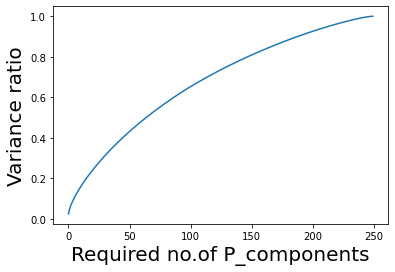

In [345]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Required no.of P_components",fontsize=20)
plt.ylabel("Variance ratio",fontsize=20)

In [191]:
np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)

37

In [192]:
# Count of variables that could explain 95% of the variance
variables=pca_tfidf.shape[1]-np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)
variables

213

### From the PCA, even without 37 variables its possible to explain around 95 % of the variance, we'll drop last 37 columns

In [193]:
# Dropping the above no.of variables

p_pca_tfidf=pca_tfidf.iloc[:,0:variables]
p_pca_tfidf

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
0,-0.026084,-0.018102,-0.018364,0.051512,-0.011506,0.085421,-0.039535,0.016214,-0.008902,-0.014480,...,0.000333,-0.000159,0.000233,-0.009469,-0.008265,0.005518,-0.001456,0.004592,0.001645,-0.002555
1,-0.099510,0.237894,0.005495,-0.028509,-0.014340,-0.008809,0.012536,-0.005864,-0.002738,-0.024509,...,0.021996,-0.047430,0.036241,0.015330,0.024736,0.043696,0.017836,-0.017532,0.029852,0.015193
2,-0.004876,-0.023727,-0.021697,-0.040542,0.017497,0.015074,0.047579,-0.042594,-0.016509,-0.036999,...,-0.001141,-0.007424,0.008593,-0.026392,-0.017433,0.013964,0.052819,-0.022972,0.004075,-0.003975
3,-0.024772,-0.016546,-0.004578,0.007825,-0.029243,0.034561,-0.011174,0.008659,-0.030431,-0.019364,...,-0.029264,0.009497,0.015153,-0.024715,-0.042265,-0.061533,0.009917,0.047075,-0.032646,-0.024569
4,-0.014914,-0.027020,0.002266,-0.000474,-0.033092,0.000830,0.013725,-0.000758,-0.027026,-0.016875,...,0.000505,0.040350,-0.094612,-0.010045,0.044631,-0.097677,0.072862,-0.010854,-0.006249,-0.007008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.054318,-0.006529,-0.021936,-0.073997,0.086793,-0.011929,-0.031696,-0.038170,-0.101269,0.001215,...,0.007064,0.010982,-0.024671,0.006777,0.000179,0.021860,0.011611,0.007712,-0.002482,0.017273
5568,-0.029182,-0.005521,-0.021215,0.187922,0.138490,0.106001,-0.127107,-0.098162,0.246534,0.018853,...,-0.001519,-0.002525,-0.001948,0.003055,0.002881,-0.000666,-0.001089,-0.003487,0.000664,0.001217
5569,-0.014764,-0.021336,-0.006721,-0.009561,-0.030341,-0.000212,-0.002059,-0.001600,-0.021098,-0.002957,...,-0.002811,-0.006371,-0.002577,0.000506,-0.000736,0.005955,-0.005970,0.001399,-0.002941,-0.002343
5570,-0.011700,-0.030274,-0.003644,-0.027759,0.003335,0.028954,0.036397,-0.045776,-0.051280,-0.008613,...,0.047714,-0.017510,-0.010730,-0.007970,-0.018784,0.038180,-0.006770,-0.009560,-0.010448,0.005850


### Visualizing the word vectors using PCA

In [329]:
# We'll reduce columns

from sklearn.decomposition import PCA
pca=PCA(n_components=2)      # 2 principal components
principalComponents=pca.fit_transform(p_pca_tfidf)
principalDf=pd.DataFrame(data=principalComponents,columns=['PC1','PC2'],index=p_pca_tfidf.index)

In [330]:
principalDf['Label']=corpus['Labels']
principalDf

,PC1,PC2,Label
0,-0.026060,-0.018071,ham
1,-0.099506,0.237898,ham
2,-0.004888,-0.023729,spam
3,-0.024763,-0.016524,ham
4,-0.014908,-0.026999,ham
...,...,...,...
5567,0.054273,-0.006531,spam
5568,-0.029214,-0.005511,ham
5569,-0.014790,-0.021344,ham
5570,-0.011702,-0.030289,ham


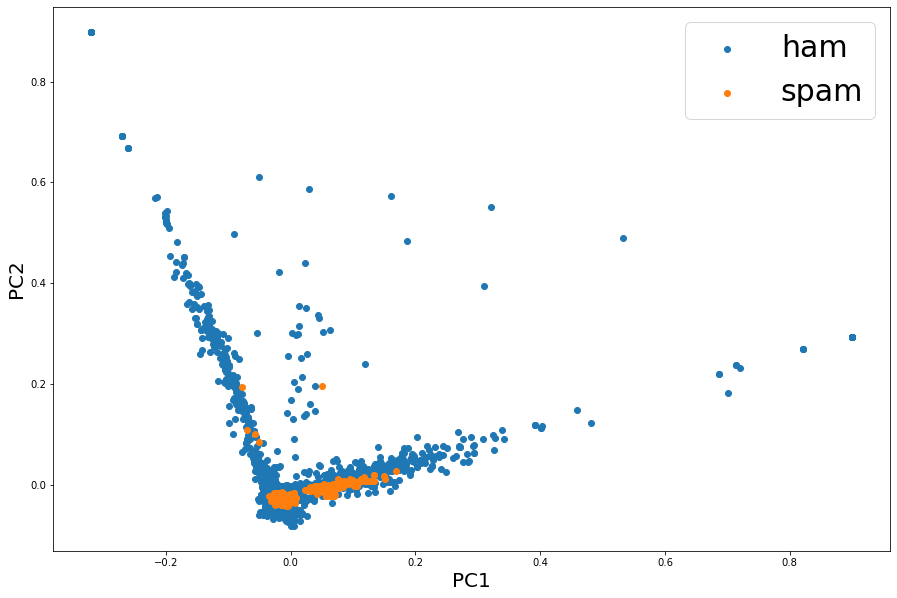

In [331]:
# Group the data by the Label
grouped = principalDf.groupby('Label')

plt.figure(figsize=(15,10))
# Plot each group as a separate scatter plot
for name, group in grouped:
    plt.scatter(group['PC1'], group['PC2'], label=name)

# Add a legend to the plot
plt.legend()

# Label the axes

plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.legend(fontsize=30)

# Show the plot
plt.show()


In [199]:
data_final = pd.concat([p_pca_tfidf,corpus_binary["Labels"]],axis=1)

X = data_final.drop(["Labels"],axis=1)
y = data_final["Labels"]

In [200]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
0,-0.026084,-0.018102,-0.018364,0.051512,-0.011506,0.085421,-0.039535,0.016214,-0.008902,-0.014480,...,0.000333,-0.000159,0.000233,-0.009469,-0.008265,0.005518,-0.001456,0.004592,0.001645,-0.002555
1,-0.099510,0.237894,0.005495,-0.028509,-0.014340,-0.008809,0.012536,-0.005864,-0.002738,-0.024509,...,0.021996,-0.047430,0.036241,0.015330,0.024736,0.043696,0.017836,-0.017532,0.029852,0.015193


In [201]:
#Splitting the data TRAIN TEST

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [202]:
#models with default parameter

lr_1 = LogisticRegression()
rf_1 = RandomForestClassifier()               #random forest
ab_1 = AdaBoostClassifier()                   #adaboost
gb_1 = GradientBoostingClassifier()           #gradientboost
xgb_1 = XGBClassifier()                       #xgboost classifier
knn_1 = KNeighborsClassifier()                #knn classifier
ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
svm_1 = SVC()                                 #support vector machines_classifier
#mnb_1 = MultinomialNB()                       #multinomial naive bayes - Cannot be applied to PCA due to negative values
bnb_1 = BernoulliNB()                         #bernoulli naive bayes

#### <u> Model performance with Default parameters

In [203]:
# default model performance on test data
import time
start = time.time()

L = [lr_1,rf_1,ab_1,gb_1,xgb_1,knn_1,ldm_1,svm_1,bnb_1] # List of models

acc_1 = []
f_1 = []
auroc_1 = []
recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    acc = mat.accuracy_score(y_test,pred)
    acc_1.append(acc)
    
    f1 = mat.f1_score(y_test,pred)
    f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_test,pred)
    auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_test,pred)
    recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":acc_1,"f1_score":f_1,"auroc":auroc_1,"recall_score":recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","XtraGradientBoosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier",
                                    "BernoulliNaiveBayes"])
df1_def_model
#df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

________________________________________
timetaken: 0.9916397929191589 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.939013,0.709402,0.777488,0.557047
RandomForest,0.965919,0.853846,0.872483,0.744966
AdaptiveBoosting,0.973094,0.896552,0.930548,0.872483
Gradient_Boosting,0.971300,0.888112,0.920999,0.852349
XtraGradientBoosting,0.972197,0.890459,0.918678,0.845638
KNeighourestNeighbour,0.966816,0.868327,0.904220,0.818792
LinearDiscriminantClassifier,0.960538,0.835821,0.872216,0.751678
SupportVectorclassifier,0.979372,0.918728,0.934171,0.872483
BernoulliNaiveBayes,0.949776,0.784615,0.837623,0.684564


In [ ]:
# IN PCA data, SupportVectorclassifier is performing well & f1 score has gained compared to original data

#  Doc2vec Embeddings framework

### 1. Embeddings

In [205]:
#embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)

### 2. Doc2Vec using genism

In [206]:
corpus

,SMS,Labels
0,"go jurong point, crazy.. avail bugi n great world la e buffet... cine got amor wat...",ham
1,ok lar... joke wif u oni...,ham
2,free entri 2 wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question(std txt rate)t&c' appli 08452810075over18',spam
3,u dun say earli hor... u c alreadi say...,ham
4,"nah think goe usf, live around though",ham
...,...,...
5567,"2nd time tri 2 contact u. u £750 pound prize. 2 claim easy, call 087187272008 now1! 10p per minute. bt-national-rate.",spam
5568,ü b go esplanad fr home?,ham
5569,"pity, * mood that. so...ani suggestions?",ham
5570,guy bitch act like i'd interest buy someth els next week gave us free,ham


In [207]:
sms_docs=list(corpus['SMS'])

In [223]:
%%time
tokenized_data = corpus.SMS.apply(lambda x: x.split()) # tokenizing 
tokenized_data

CPU times: total: 31.2 ms
Wall time: 22.2 ms


0       [go, jurong, point,, crazy.., avail, bugi, n, great, world, la, e, buffet..., cine, got, amor, wat...]                                                           
1       [ok, lar..., joke, wif, u, oni...]                                                                                                                               
2       [free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005., text, fa, 87121, receiv, entri, question(std, txt, rate)t&c', appli, 08452810075over18']
3       [u, dun, say, earli, hor..., u, c, alreadi, say...]                                                                                                              
4       [nah, think, goe, usf,, live, around, though]                                                                                                                    
                            ...                                                                                                                       

In [224]:
import gensim

In [225]:
model_w2v = gensim.models.Word2Vec(
            tokenized_data,
            vector_size=300, # desired no. of features/independent variables
            window=3, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 1
) 

In [226]:
model_w2v.train(tokenized_data, total_examples= len(corpus.SMS), epochs=20)

(886070, 1108680)

In [227]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [228]:
wordvec_arrays = np.zeros((len(tokenized_data), 300)) 
for i in range(len(tokenized_data)):
    wordvec_arrays[i,:] = word_vector(tokenized_data[i], 300)
docvec_df = pd.DataFrame(wordvec_arrays)
docvec_df.shape

(5572, 300)

In [229]:
docvec_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.056986,0.168516,0.113574,0.279734,0.058892,-0.219041,0.207841,0.559167,0.100588,0.076981,...,-0.105517,0.328600,0.218420,0.015273,0.253527,0.211044,0.077748,-0.021697,0.199364,0.073025
1,0.091315,0.201131,0.058412,0.289119,0.034954,-0.341853,0.289635,0.543683,0.061940,0.109592,...,-0.019722,0.296570,0.215874,0.006248,0.475475,0.188349,0.215154,0.021387,0.199882,-0.005769
2,0.137124,0.185410,-0.080345,-0.026708,0.180251,-0.328045,0.023443,0.494865,-0.005259,-0.021790,...,-0.246170,0.382840,0.227986,0.090956,0.109899,0.291686,-0.207038,-0.125911,0.393883,0.008172
3,0.035509,0.176752,0.065247,0.441086,0.007777,-0.369974,0.281510,0.584584,0.060243,0.140535,...,-0.085880,0.370575,0.323156,0.025648,0.488217,0.267140,0.282214,0.130157,0.174675,0.017082
4,-0.063130,0.232990,-0.029187,0.132561,0.038882,-0.244194,0.141203,0.409121,0.050780,-0.129762,...,0.092289,0.339330,0.194313,0.095620,0.249356,0.288441,0.057704,-0.090987,0.086685,-0.119233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.112181,0.207402,-0.224342,0.125191,0.114258,-0.413579,0.039330,0.522419,0.055555,-0.009089,...,-0.118514,0.381227,0.277566,-0.141369,0.427949,0.341619,-0.061040,-0.244261,0.361635,-0.131288
5568,0.100895,0.219858,0.144531,0.201397,0.224220,-0.280253,0.311030,0.502821,0.071300,0.085184,...,0.044050,0.345665,0.214740,-0.010108,0.536714,0.075225,0.147715,0.075786,0.316018,0.026049
5569,-0.044320,0.157202,0.037038,0.226725,-0.019280,-0.227276,0.145894,0.468862,0.082626,-0.054156,...,-0.007621,0.318318,0.169714,0.038109,0.208866,0.294734,0.094537,-0.070722,0.033470,-0.053664
5570,0.044728,0.183573,-0.008139,0.105137,0.037632,-0.286731,0.170174,0.543766,0.014854,-0.025543,...,-0.067063,0.349719,0.179960,0.107200,0.232966,0.261312,0.079890,-0.058382,0.121021,-0.076859


In [ ]:
#docvec_df.to_csv('5572docsembedded.csv')

In [231]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.056986,0.168516,0.113574,0.279734,0.058892,-0.219041,0.207841,0.559167,0.100588,0.076981,...,-0.105517,0.32860,0.218420,0.015273,0.253527,0.211044,0.077748,-0.021697,0.199364,0.073025
1,0.091315,0.201131,0.058412,0.289119,0.034954,-0.341853,0.289635,0.543683,0.061940,0.109592,...,-0.019722,0.29657,0.215874,0.006248,0.475475,0.188349,0.215154,0.021387,0.199882,-0.005769


In [232]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Labels, Length: 5572, dtype: int64

In [233]:
#Splitting the data TRAIN TEST

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [234]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC 

In [241]:
#models with default parameter

lr_1 = LogisticRegression()
rf_1 = RandomForestClassifier()               #random forest
ab_1 = AdaBoostClassifier()                   #adaboost
gb_1 = GradientBoostingClassifier()           #gradientboost
xgb_1 = XGBClassifier()                       #xgboost classifier
knn_1 = KNeighborsClassifier()                #knn classifier
ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
svm_1 = SVC()                                 #support vector machines_classifier
#mnb_1 = MultinomialNB()                       #multinomial naive bayes - cant be applied because of negative vectors
bnb_1 = BernoulliNB()                         #bernoulli naive bayes

#### <u> Model performance with Default parameters

In [242]:
# default model performance on test data
import time
start = time.time()

L = [lr_1,rf_1,ab_1,gb_1,xgb_1,knn_1,ldm_1,svm_1,bnb_1] # List of models

acc_1 = []
f_1 = []
auroc_1 = []
recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    acc = mat.accuracy_score(y_test,pred)
    acc_1.append(acc)
    
    f1 = mat.f1_score(y_test,pred)
    f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_test,pred)
    auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_test,pred)
    recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":acc_1,"f1_score":f_1,"auroc":auroc_1,"recall_score":recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","XtraGradientBoosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier",
                                    "BernoulliNaiveBayes"])
df1_def_model
#df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

________________________________________
timetaken: 1.3988413572311402 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.959641,0.833948,0.874536,0.758389
RandomForest,0.976682,0.908451,0.929780,0.865772
AdaptiveBoosting,0.964126,0.861111,0.908343,0.832215
Gradient_Boosting,0.971300,0.888112,0.920999,0.852349
XtraGradientBoosting,0.969507,0.881119,0.917125,0.845638
KNeighourestNeighbour,0.965022,0.867797,0.920213,0.859060
LinearDiscriminantClassifier,0.950673,0.805654,0.872198,0.765101
SupportVectorclassifier,0.966816,0.867384,0.901382,0.812081
BernoulliNaiveBayes,0.937220,0.790419,0.915520,0.885906


#### <u> Hyperparameter tuning to find the best parameters

#### <font color= BLUE>1.RANDOM FOREST  

#### Choosing best parameters

In [243]:
start = time.time()

rf_1 = RandomForestClassifier()

params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.5)]}

rf_2 = RandomizedSearchCV(estimator=rf_1, param_distributions=params,n_iter=50,cv=5)
rf_2.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

rf_2.best_params_

timetaken: 3.263234627246857 min


{'class_weight': {0: 1.5, 1: 1}}

#### Model testing with best parameters

In [246]:
rf_2 = RandomForestClassifier(class_weight = {0: 1.5, 1: 1},random_state=42)
rf_2.fit(X_train,y_train) 

RandomForestClassifier(class_weight={0: 1.5, 1: 1}, random_state=42)

In [247]:
#Prediction on test data
y_pred = rf_2.predict(X_test)

In [248]:
#accuracy score
rf_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",rf_acc_2)

#f1 score
rf_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",rf_f1_2)

#auroc score
rf_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",rf_auroc_2)

#recall
rf_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",rf_recall_score_2)

#print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9739910313901345
F1 Score: 0.8989547038327527
Auroc: 0.9282275209471008
Recall 0.8859060402684564
[[957   9]
 [ 20 129]]


# .................................................................................................................................

#### <font color= BLUE> 2.XG BOOSTING

#### Choosing best parameters

#### Model testing with best parameters

In [249]:
#fitting the model with best parameter
xgb_cv = XGBClassifier(subsample= 0.90, n_estimators= 500, max_depth= 19, colsample_bytree= 0.80,random_state=42)
xgb_cv.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=19, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [250]:
#Prediction on test data with best parameters
y_pred = xgb_cv.predict(X_test)

In [251]:
#accuracy score
xgb_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",xgb_acc_2)

xgb_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",xgb_f1_2)

xgb_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",xgb_auroc_2)

#recall
xgb_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",xgb_recall_score_2)

#print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9757847533632287
F1 Score: 0.9045936395759717
Auroc: 0.9264246112801701
Recall 0.8859060402684564
[[960   6]
 [ 21 128]]


# .................................................................................................................................

#### <font color= BLUE> 3. SUPPORT VECTOR CLASSIFIER

#### Choosing best parameters

In [252]:
#Finding the best parameter
start = time.time()

#defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
svc_cv = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
#fitting the model for grid search
svc_cv.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",svc_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.973 total time=   1.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.973 total time=   1.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.969 total time=   1.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.965 total time=   1.3s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.975 total time=   1.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.975 total time=   0.8s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.978 total time=   0.8s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.979 total time=   0.8s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.970 total time=   0.8s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.970 total time=   0.8s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.979 total time=   0.6s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;

#### Model testing with best parameters

In [253]:
#fitting the model with best parameter
svc_cv = SVC(kernel = 'rbf', gamma = 0.1, C = 10)
svc_cv.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [254]:
#Prediction on test data with best parameters
y_pred = svc_cv.predict(X_test)

In [255]:
#accuracy score
svc_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",svc_acc_2)

svc_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",svc_f1_2)

svc_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",svc_auroc_2)

#recall
svc_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",svc_recall_score_2)

#print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9713004484304932
F1 Score: 0.8865248226950355
Auroc: 0.9153223004988397
Recall 0.8859060402684564
[[958   8]
 [ 24 125]]


# .................................................................................................................................

#### <font color= BLUE> 5.BERNOULLI NAIVE BAYES

* Naive Bayes classifier for multivariate Bernoulli models.Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts,BernoulliNB is designed for binary/boolean features.

#### Choosing best parameters

In [257]:
#Finding the best parameter
start = time.time()


#defining parameter range
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
b_grid_NB = {'alpha': alphas,'fit_prior': [True, False]}  #, 'class_prior ' : [None, [.1,.9],[.2, .8]]}

bnb_1 = BernoulliNB()

#fitting the model for grid search
b_nb = RandomizedSearchCV(estimator = bnb_1, param_distributions = b_grid_NB, scoring = 'f1',n_iter=50, cv = 5)
b_nb.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

print("Best Parameters:",b_nb.best_params_)

timetaken: 0.1 min
Best Parameters: {'fit_prior': True, 'alpha': 0.1}


#### Model testing with best parameters

In [258]:
#fitting the model with best parameter
b_nb = BernoulliNB(fit_prior= True, alpha= 1.0)
b_nb.fit(X_train,y_train)

BernoulliNB()

In [259]:
#Prediction on test data with best parameters
y_pred = b_nb.predict(X_test)

In [260]:
#accuracy score
bnb_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",bnb_acc_2)

bnb_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",bnb_f1_2)

bnb_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",bnb_auroc_2)

#recall
bnb_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",bnb_recall_score_2)

#print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9372197309417041
F1 Score: 0.7904191616766467
Auroc: 0.9155203079189074
Recall 0.8859060402684564
[[913  53]
 [ 17 132]]


In [263]:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')

indexes1 = ["LogisticRegression","RandomForest","AdaptiveBoosting","Gradient_Boosting","XtraGradientBoosting","KNeighourestNeighbour","LinearDiscriminantClassifier","SupportVectorclassifier","BernoulliNaiveBayes"]
indexes2 = ["RandomForest","XtraGradientBoosting","SupportVectorclassifier","BernoulliNaiveBayes"]

df1 = pd.DataFrame({"Accuracy":acc_1,"F1_score":f_1,"Auroc":auroc_1,"Recall":recall_1},index=indexes1)

df2 = pd.DataFrame({"Accuracy":[rf_acc_2,xgb_acc_2,svc_acc_2,bnb_acc_2],
                    "F1_Score":[rf_f1_2,xgb_f1_2,svc_f1_2,bnb_f1_2],
                    "Auroc":[rf_auroc_2,xgb_auroc_2,svc_auroc_2,bnb_auroc_2],
                   "Recall":[rf_recall_score_2,xgb_recall_score_2,svc_recall_score_2,bnb_recall_score_2]},index=indexes2)


#df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on Test_data with default params")
#df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Best Model's Performance on Test_data with Optimized params")

#display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

df1          # Default paramters

,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.959641,0.833948,0.874536,0.758389
RandomForest,0.976682,0.908451,0.929780,0.865772
AdaptiveBoosting,0.964126,0.861111,0.908343,0.832215
Gradient_Boosting,0.971300,0.888112,0.920999,0.852349
XtraGradientBoosting,0.969507,0.881119,0.917125,0.845638
KNeighourestNeighbour,0.965022,0.867797,0.920213,0.859060
LinearDiscriminantClassifier,0.950673,0.805654,0.872198,0.765101
SupportVectorclassifier,0.966816,0.867384,0.901382,0.812081
BernoulliNaiveBayes,0.937220,0.790419,0.915520,0.885906


In [264]:
df2  # Hyperparameter tuned for best models - We can see slight improvements after cross validation

,Accuracy,F1_Score,Auroc,Recall
RandomForest,0.973991,0.898955,0.928228,0.885906
XtraGradientBoosting,0.975785,0.904594,0.926425,0.885906
SupportVectorclassifier,0.971300,0.886525,0.915322,0.885906
BernoulliNaiveBayes,0.937220,0.790419,0.915520,0.885906


## Dimensionality reduction using Principal Component Analysis

### PCA on unscaled data

In [346]:
docvec_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.056986,0.168516,0.113574,0.279734,0.058892,-0.219041,0.207841,0.559167,0.100588,0.076981,...,-0.105517,0.328600,0.218420,0.015273,0.253527,0.211044,0.077748,-0.021697,0.199364,0.073025
1,0.091315,0.201131,0.058412,0.289119,0.034954,-0.341853,0.289635,0.543683,0.061940,0.109592,...,-0.019722,0.296570,0.215874,0.006248,0.475475,0.188349,0.215154,0.021387,0.199882,-0.005769
2,0.137124,0.185410,-0.080345,-0.026708,0.180251,-0.328045,0.023443,0.494865,-0.005259,-0.021790,...,-0.246170,0.382840,0.227986,0.090956,0.109899,0.291686,-0.207038,-0.125911,0.393883,0.008172
3,0.035509,0.176752,0.065247,0.441086,0.007777,-0.369974,0.281510,0.584584,0.060243,0.140535,...,-0.085880,0.370575,0.323156,0.025648,0.488217,0.267140,0.282214,0.130157,0.174675,0.017082
4,-0.063130,0.232990,-0.029187,0.132561,0.038882,-0.244194,0.141203,0.409121,0.050780,-0.129762,...,0.092289,0.339330,0.194313,0.095620,0.249356,0.288441,0.057704,-0.090987,0.086685,-0.119233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.112181,0.207402,-0.224342,0.125191,0.114258,-0.413579,0.039330,0.522419,0.055555,-0.009089,...,-0.118514,0.381227,0.277566,-0.141369,0.427949,0.341619,-0.061040,-0.244261,0.361635,-0.131288
5568,0.100895,0.219858,0.144531,0.201397,0.224220,-0.280253,0.311030,0.502821,0.071300,0.085184,...,0.044050,0.345665,0.214740,-0.010108,0.536714,0.075225,0.147715,0.075786,0.316018,0.026049
5569,-0.044320,0.157202,0.037038,0.226725,-0.019280,-0.227276,0.145894,0.468862,0.082626,-0.054156,...,-0.007621,0.318318,0.169714,0.038109,0.208866,0.294734,0.094537,-0.070722,0.033470,-0.053664
5570,0.044728,0.183573,-0.008139,0.105137,0.037632,-0.286731,0.170174,0.543766,0.014854,-0.025543,...,-0.067063,0.349719,0.179960,0.107200,0.232966,0.261312,0.079890,-0.058382,0.121021,-0.076859


In [347]:
# DOing PCA on the above data

from sklearn.decomposition import PCA
pca=PCA()
pca_comp=pca.fit_transform(docvec_df)
pca_doc2vec=pd.DataFrame(pca_comp)
pca_doc2vec

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.187333,-0.573334,-0.630594,0.479125,0.171780,-0.090239,-0.209657,0.110666,0.291019,-0.183560,...,0.000425,-0.000673,0.000501,0.000530,-0.000036,0.000553,0.000284,-0.001748,-0.000431,0.000112
1,-0.823330,-1.294412,-0.416409,0.220791,-0.171963,-0.108898,0.174285,0.041019,-0.121555,0.155880,...,-0.000609,-0.000044,-0.000749,0.000271,-0.000244,0.000345,0.001774,-0.000691,0.000241,0.000846
2,2.226585,-0.161189,-0.750582,-0.008492,0.252734,0.226794,-0.202747,-0.021353,-0.320641,-0.092610,...,0.000597,0.000507,-0.000369,-0.000301,0.000645,-0.000534,-0.000103,-0.000085,0.000311,-0.000254
3,-1.163514,-1.221464,-0.966497,0.040143,-0.556802,-0.022676,0.275616,0.011140,-0.235539,0.168124,...,-0.000993,-0.000375,0.000290,-0.000769,-0.000173,-0.000116,0.000891,-0.000250,-0.000227,-0.000495
4,-0.339848,0.661464,0.343325,-0.348248,0.132503,-0.191521,-0.372759,-0.232529,-0.114400,0.018077,...,-0.000394,-0.000253,0.000439,-0.000866,-0.000982,0.000064,-0.000170,-0.000390,0.000461,0.000465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,2.050659,-0.738732,-0.427015,-0.592654,-1.127452,-0.261174,0.031421,-0.196197,-0.231321,-0.513919,...,0.000471,0.000366,-0.000476,0.000006,0.000659,-0.000016,-0.001028,0.000145,0.000304,-0.000394
5568,-0.512477,-1.805817,-0.364088,0.009404,0.438187,-0.023894,-0.185261,0.060138,0.074587,-0.012441,...,-0.001774,-0.000345,-0.000553,0.000616,-0.000055,-0.000212,-0.000638,0.000609,0.000552,0.000231
5569,-0.525920,0.448099,0.113326,-0.065282,0.050455,-0.311717,-0.139327,0.193793,0.035979,0.086062,...,0.001117,-0.000278,-0.000443,-0.000140,0.001448,0.001400,-0.000357,-0.000951,-0.000513,0.000665
5570,0.136981,-0.081247,0.088032,-0.032146,0.160034,0.066898,0.101886,0.250356,-0.079994,-0.370027,...,0.000519,-0.000374,-0.000450,0.001247,-0.000457,-0.000129,-0.000253,-0.000025,0.000167,-0.001063


In [348]:
pca_doc2vec.shape

(5572, 300)

### Variance Proportion

In [349]:
pca.explained_variance_ratio_

array([2.93091271e-01, 1.83131545e-01, 1.37150313e-01, 1.04093963e-01,
       5.52307796e-02, 4.95926427e-02, 3.58598316e-02, 2.51641830e-02,
       2.07639173e-02, 1.94131543e-02, 1.59206726e-02, 1.16639789e-02,
       8.87080537e-03, 5.57636761e-03, 4.50152514e-03, 3.41263155e-03,
       2.75490758e-03, 2.64979287e-03, 2.13699351e-03, 1.77520147e-03,
       1.72538933e-03, 1.37013875e-03, 1.22448767e-03, 1.15863747e-03,
       1.04098887e-03, 9.41539448e-04, 8.49779839e-04, 7.72737471e-04,
       6.31937743e-04, 5.72653936e-04, 5.36003448e-04, 5.05578262e-04,
       3.95611190e-04, 3.59879034e-04, 3.24987760e-04, 2.98548166e-04,
       2.69149282e-04, 2.57103976e-04, 2.34790078e-04, 2.21579228e-04,
       2.14429899e-04, 1.91102777e-04, 1.82264740e-04, 1.55198148e-04,
       1.45089815e-04, 1.44241288e-04, 1.25340109e-04, 1.21830654e-04,
       1.13949096e-04, 1.06095410e-04, 1.02179685e-04, 9.66989165e-05,
       8.89039049e-05, 7.78592252e-05, 7.51763323e-05, 7.34348219e-05,
      

Text(0, 0.5, 'Variance ratio')

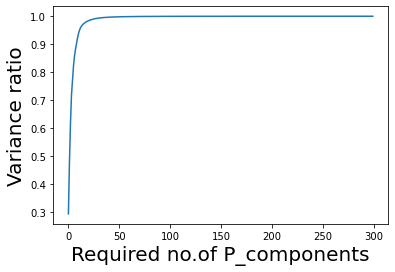

In [351]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Required no.of P_components",fontsize=20)
plt.ylabel("Variance ratio",fontsize=20)

In [271]:
np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)

289

In [272]:
# Count of variables that could explain 95% of the variance
variables=pca_doc2vec.shape[1]-np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)
variables

11

### From the PCA, even without 288 variables its possible to explain around 95 % of the variance, we'll drop last 288 columns  - Massive reduction we can observe here

In [273]:
# Dropping the above no.of variables

p_pca_doc2vec=pca_doc2vec.iloc[:,0:variables]
p_pca_doc2vec

,0,1,2,3,4,5,6,7,8,9,10
0,-0.187333,-0.573334,-0.630594,0.479125,0.171780,-0.090239,-0.209657,0.110666,0.291019,-0.183560,0.180190
1,-0.823330,-1.294412,-0.416409,0.220791,-0.171963,-0.108898,0.174285,0.041019,-0.121555,0.155880,-0.031413
2,2.226585,-0.161189,-0.750582,-0.008492,0.252734,0.226794,-0.202747,-0.021353,-0.320641,-0.092610,0.110791
3,-1.163514,-1.221464,-0.966497,0.040143,-0.556802,-0.022676,0.275616,0.011140,-0.235539,0.168124,0.017993
4,-0.339848,0.661464,0.343325,-0.348248,0.132503,-0.191521,-0.372759,-0.232529,-0.114400,0.018077,-0.032581
...,...,...,...,...,...,...,...,...,...,...,...
5567,2.050659,-0.738732,-0.427015,-0.592654,-1.127452,-0.261174,0.031421,-0.196197,-0.231321,-0.513919,-0.082082
5568,-0.512477,-1.805817,-0.364088,0.009404,0.438187,-0.023894,-0.185261,0.060138,0.074587,-0.012441,0.072109
5569,-0.525920,0.448099,0.113326,-0.065282,0.050455,-0.311717,-0.139327,0.193793,0.035979,0.086062,0.108630
5570,0.136981,-0.081247,0.088032,-0.032146,0.160034,0.066898,0.101886,0.250356,-0.079994,-0.370027,0.051524


In [275]:
#p_pca_doc2vec.to_csv("PCA_Doc2Vec.csv",index=False)

### Visualizing the word vectors using PCA

In [320]:
# We'll reduce columns

from sklearn.decomposition import PCA
pca=PCA(n_components=2)      # 2 principal components
principalComponents=pca.fit_transform(p_pca_doc2vec)
principalDf=pd.DataFrame(data=principalComponents,columns=['PC1','PC2'],index=p_pca_doc2vec.index)

In [321]:
principalDf['Label']=corpus['Labels']
principalDf

,PC1,PC2,Label
0,-0.187333,-0.573334,ham
1,-0.823330,-1.294412,ham
2,2.226585,-0.161189,spam
3,-1.163514,-1.221464,ham
4,-0.339848,0.661464,ham
...,...,...,...
5567,2.050659,-0.738732,spam
5568,-0.512477,-1.805817,ham
5569,-0.525920,0.448099,ham
5570,0.136981,-0.081247,ham


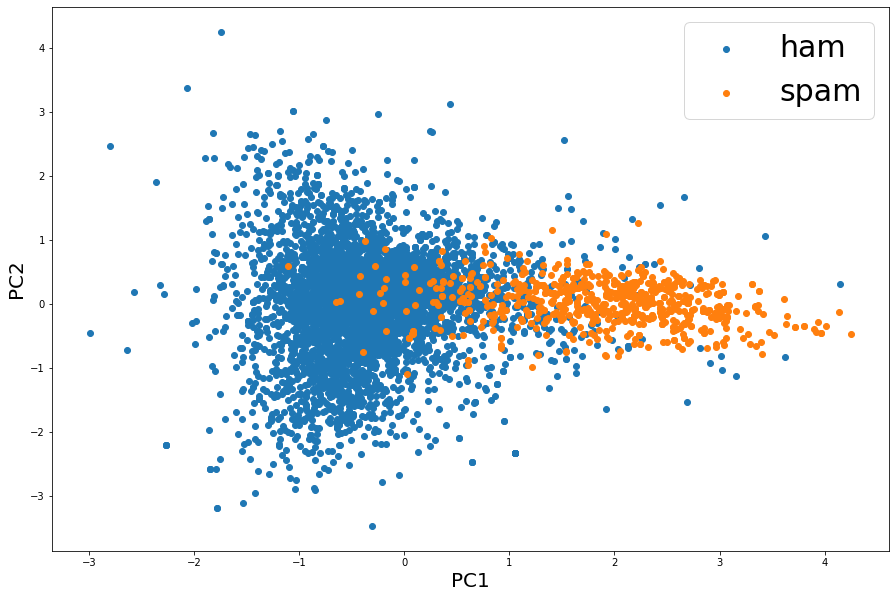

In [328]:
# Group the data by the Label
grouped = principalDf.groupby('Label')

plt.figure(figsize=(15,10))
# Plot each group as a separate scatter plot
for name, group in grouped:
    plt.scatter(group['PC1'], group['PC2'], label=name)

# Add a legend to the plot
plt.legend()

# Label the axes
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.legend(fontsize=30)
# Show the plot
plt.show()


In [312]:
data_final = pd.concat([p_pca_doc2vec,corpus_binary["Labels"]],axis=1)

X = data_final.drop(["Labels"],axis=1)
y = data_final["Labels"]

In [313]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.187333,-0.573334,-0.630594,0.479125,0.171780,-0.090239,-0.209657,0.110666,0.291019,-0.18356,0.180190
1,-0.823330,-1.294412,-0.416409,0.220791,-0.171963,-0.108898,0.174285,0.041019,-0.121555,0.15588,-0.031413


In [314]:
#Splitting the data TRAIN TEST

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [315]:
#models with default parameter

lr_1 = LogisticRegression()
rf_1 = RandomForestClassifier()               #random forest
ab_1 = AdaBoostClassifier()                   #adaboost
gb_1 = GradientBoostingClassifier()           #gradientboost
xgb_1 = XGBClassifier()                       #xgboost classifier
knn_1 = KNeighborsClassifier()                #knn classifier
ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
svm_1 = SVC()                                 #support vector machines_classifier
#mnb_1 = MultinomialNB()                       #multinomial naive bayes - Cannot be applied to PCA due to negative values
bnb_1 = BernoulliNB()                         #bernoulli naive bayes

#### <u> Model performance with Default parameters

In [316]:
# default model performance on test data
import time
start = time.time()

L = [lr_1,rf_1,ab_1,gb_1,xgb_1,knn_1,ldm_1,svm_1,bnb_1] # List of models

acc_1 = []
f_1 = []
auroc_1 = []
recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    acc = mat.accuracy_score(y_test,pred)
    acc_1.append(acc)
    
    f1 = mat.f1_score(y_test,pred)
    f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_test,pred)
    auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_test,pred)
    recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":acc_1,"f1_score":f_1,"auroc":auroc_1,"recall_score":recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","XtraGradientBoosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier",
                                    "BernoulliNaiveBayes"])
df1_def_model
#df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

________________________________________
timetaken: 0.09625639915466308 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.959641,0.836364,0.880212,0.771812
RandomForest,0.968610,0.877193,0.913770,0.838926
AdaptiveBoosting,0.968610,0.878893,0.919446,0.852349
Gradient_Boosting,0.966816,0.873720,0.921249,0.859060
XtraGradientBoosting,0.971300,0.889655,0.926675,0.865772
KNeighourestNeighbour,0.966816,0.873720,0.921249,0.859060
LinearDiscriminantClassifier,0.957848,0.830325,0.879177,0.771812
SupportVectorclassifier,0.969507,0.881119,0.917125,0.845638
BernoulliNaiveBayes,0.873543,0.165680,0.543874,0.093960


In [317]:
# IN PCA data, XG boost & SupportVectorclassifier is performing well & f1 score has gained compared to original data

## Heuristic approach -  Counted presence of trigger words in each sentences

In [685]:
trigger_words=pd.read_csv('triggerwords.csv')
trigger_words

,Unnamed: 0,0
0,0,growth
1,1,turned
2,2,terms
3,3,human
4,4,catch
...,...,...
395,395,special
396,396,scam
397,397,bulk
398,398,car


In [686]:
# References
# https://ortto.com/learn/spam-trigger-words/
# https://www.activecampaign.com/blog/spam-words
# https://www.textmagic.com/blog/email-sms-spam-words-to-avoid-business/

In [687]:
# Trigger words we collected from different resources

trigger_words['0'].sample(20)

393    initial    
244    own        
341    champion   
51     supplies   
201    pure       
233    for?       
144    lowest     
365    order      
168    dollar     
33     consolidate
334    bad        
234    necessary  
147    all        
16     guaranteed 
368    certified  
358    new        
54     earnings   
174    refund     
127    opt-in     
42     income     
Name: 0, dtype: object

In [688]:
# Counted the presence of trigger words in each documents and created a discrete numerical variable

In [689]:
heuristic=pd.read_csv('heuristic.csv')
heuristic

,SMS,userdefined_spamword_presence
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",3
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,7
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives around here though",2
...,...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",11
5568,Will ü b going to esplanade fr home?,1
5569,"Pity, * was in mood for that. So...any other suggestions?",2
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,9


In [690]:
tfidf_vec3

,150p,50,again,ah,aight,alreadi,already,also,alway,amp,...,www,ya,ye,yeah,year,yes,yet,yo,you,yup
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.349907,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [691]:
data_final = pd.concat([tfidf_vec3,heuristic['userdefined_spamword_presence'],corpus_binary["Labels"]],axis=1)

X = data_final.drop(["Labels"],axis=1)
y = data_final["Labels"]

In [692]:
X.head(2)

,150p,50,again,ah,aight,alreadi,already,also,alway,amp,...,ya,ye,yeah,year,yes,yet,yo,you,yup,userdefined_spamword_presence
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [693]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Labels, Length: 5572, dtype: int64

In [694]:
#Splitting the data TRAIN TEST

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [695]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC 

In [697]:
#models with default parameter

lr_1 = LogisticRegression()
rf_1 = RandomForestClassifier()               #random forest
ab_1 = AdaBoostClassifier()                   #adaboost
gb_1 = GradientBoostingClassifier()           #gradientboost
xgb_1 = XGBClassifier()                       #xgboost classifier
knn_1 = KNeighborsClassifier()                #knn classifier
ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
svm_1 = SVC()                                 #support vector machines_classifier
mnb_1 = MultinomialNB()                       #multinomial naive bayes
bnb_1 = BernoulliNB()                         #bernoulli naive bayes

#### <u> Model performance with Default parameters

In [698]:
# default model performance on test data
import time
start = time.time()

L = [lr_1,rf_1,ab_1,gb_1,xgb_1,knn_1,ldm_1,svm_1,mnb_1,bnb_1] # List of models

acc_1 = []
f_1 = []
auroc_1 = []
recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    acc = mat.accuracy_score(y_test,pred)
    acc_1.append(acc)
    
    f1 = mat.f1_score(y_test,pred)
    f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_test,pred)
    auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_test,pred)
    recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":acc_1,"f1_score":f_1,"auroc":auroc_1,"recall_score":recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","XtraGradientBoosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier",
                                    "MultinomialNaiveBayes","BernoulliNaiveBayes"])
df1_def_model

________________________________________
timetaken: 0.19931256771087646 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.940807,0.722689,0.787038,0.577181
RandomForest,0.975785,0.906574,0.934939,0.879195
AdaptiveBoosting,0.970404,0.882562,0.911967,0.832215
Gradient_Boosting,0.967713,0.868613,0.896223,0.798658
XtraGradientBoosting,0.978475,0.916667,0.939330,0.885906
KNeighourestNeighbour,0.908520,0.607692,0.748538,0.530201
LinearDiscriminantClassifier,0.959641,0.828897,0.863184,0.731544
SupportVectorclassifier,0.866368,0.000000,0.500000,0.000000
MultinomialNaiveBayes,0.933632,0.672566,0.754516,0.510067
BernoulliNaiveBayes,0.975785,0.904594,0.926425,0.859060


In [699]:
## With the addition of count of Trigger words in TF IDF , the classification accuracy and F1 score have been improved greatly
# improved 

#### <u> Hyperparameter tuning to find the best parameters

#### <font color= BLUE>1.RANDOM FOREST  

#### Choosing best parameters

In [700]:
start = time.time()

rf_1 = RandomForestClassifier()

params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.5)]}

rf_2 = RandomizedSearchCV(estimator=rf_1, param_distributions=params,n_iter=50,cv=5)
rf_2.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

rf_2.best_params_

timetaken: 1.1684902429580688 min


{'class_weight': {0: 4.0, 1: 1}}

#### Model testing with best parameters

In [701]:
rf_2 = RandomForestClassifier(class_weight = {0: 1.5, 1: 1},random_state=42)
rf_2.fit(X_train,y_train) 

RandomForestClassifier(class_weight={0: 1.5, 1: 1}, random_state=42)

In [702]:
#Prediction on test data
y_pred = rf_2.predict(X_test)

In [703]:
#accuracy score
rf_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",rf_acc_2)

#f1 score
rf_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",rf_f1_2)

#auroc score
rf_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",rf_auroc_2)

#recall
rf_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",rf_recall_score_2)

#print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9766816143497757
F1 Score: 0.9097222222222223
Auroc: 0.9354565286867591
Recall 0.8590604026845637
[[958   8]
 [ 18 131]]


# .................................................................................................................................

#### <font color= BLUE> 2.XG BOOSTING

#### Model testing with best parameters

In [704]:
#fitting the model with best parameter
xgb_cv = XGBClassifier(subsample= 0.90, n_estimators= 500, max_depth= 19, colsample_bytree= 0.80,random_state=42)
xgb_cv.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=19, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [705]:
#Prediction on test data with best parameters
y_pred = xgb_cv.predict(X_test)

In [706]:
#accuracy score
xgb_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",xgb_acc_2)

xgb_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",xgb_f1_2)

xgb_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",xgb_auroc_2)

#recall
xgb_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",xgb_recall_score_2)

#print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9713004484304932
F1 Score: 0.888888888888889
Auroc: 0.9238366195617437
Recall 0.8590604026845637
[[955  11]
 [ 21 128]]


# .................................................................................................................................

#### <font color= BLUE> 3. SUPPORT VECTOR CLASSIFIER

#### Choosing best parameters

In [707]:
#Finding the best parameter
start = time.time()

#defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
svc_cv = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
#fitting the model for grid search
svc_cv.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",svc_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time=   2.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time=   1.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   1.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   1.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time=   1.5s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.865 total time=   1.2s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.865 total time=   1.2s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.866 total time=   1.3s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.866 total time=   1.2s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.865 total time=   1.3s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.865 total time=   1.3s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;

#### Model testing with best parameters

In [708]:
#fitting the model with best parameter
svc_cv = SVC(kernel = 'rbf', gamma = 0.1, C = 10)
svc_cv.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [709]:
#Prediction on test data with best parameters
y_pred = svc_cv.predict(X_test)

In [710]:
#accuracy score
svc_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",svc_acc_2)

svc_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",svc_f1_2)

svc_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",svc_auroc_2)

#recall
svc_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",svc_recall_score_2)

#print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9659192825112107
F1 Score: 0.856060606060606
Auroc: 0.8781594341851126
Recall 0.8590604026845637
[[964   2]
 [ 36 113]]


# .................................................................................................................................

#### Model testing with best parameters

In [711]:
#fitting the model with best parameter
multi_nb = MultinomialNB(fit_prior= True, alpha= 0.8)
multi_nb.fit(X_train,y_train)

MultinomialNB(alpha=0.8)

In [712]:
#Prediction on test data with best parameters
y_pred = multi_nb.predict(X_test)

In [713]:
#accuracy score
mnb_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",mnb_acc_2)

mnb_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",mnb_f1_2)

mnb_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",mnb_auroc_2)

#recall
mnb_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",mnb_recall_score_2)

#print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9354260089686098
F1 Score: 0.6842105263157895
Auroc: 0.7612273680992676
Recall 0.8590604026845637
[[965   1]
 [ 71  78]]


# .................................................................................................................................

#### <font color= BLUE> 4. MULTINOMIAL NAIVE BAYES

* The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However,in practice, fractional counts such as tf-idf may also work.

#### Choosing best parameters

In [714]:
#Finding the best parameter
start = time.time()

#defining parameter range
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_grid_NB = {'alpha': alphas, 'fit_prior' : [True, False]}                     #, 'class_prior ' : [None, [.1,.9],[.2, .8]]}

mnb_1 = MultinomialNB() 

#fitting the model for grid search
multi_nb = RandomizedSearchCV(estimator = mnb_1, param_distributions = p_grid_NB, scoring = 'f1',n_iter=50, cv = 5)
multi_nb.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

print("Best Parameters:",multi_nb.best_params_)

timetaken: 0.04 min
Best Parameters: {'fit_prior': True, 'alpha': 0.1}


#### Model testing with best parameters

In [715]:
#fitting the model with best parameter
multi_nb = MultinomialNB(fit_prior= True, alpha= 0.8)
multi_nb.fit(X_train,y_train)

MultinomialNB(alpha=0.8)

In [716]:
#Prediction on test data with best parameters
y_pred = multi_nb.predict(X_test)

In [717]:
#accuracy score
mnb_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",mnb_acc_2)

mnb_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",mnb_f1_2)

mnb_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",mnb_auroc_2)

#recall
mnb_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",mnb_recall_score_2)

#print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9354260089686098
F1 Score: 0.6842105263157895
Auroc: 0.7612273680992676
Recall 0.8590604026845637
[[965   1]
 [ 71  78]]


# .................................................................................................................................

#### <font color= BLUE> 5.BERNOULLI NAIVE BAYES

* Naive Bayes classifier for multivariate Bernoulli models.Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts,BernoulliNB is designed for binary/boolean features.

#### Choosing best parameters

In [718]:
#Finding the best parameter
start = time.time()


#defining parameter range
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
b_grid_NB = {'alpha': alphas,'fit_prior': [True, False]}  #, 'class_prior ' : [None, [.1,.9],[.2, .8]]}

bnb_1 = BernoulliNB()

#fitting the model for grid search
b_nb = RandomizedSearchCV(estimator = bnb_1, param_distributions = b_grid_NB, scoring = 'f1',n_iter=50, cv = 5)
b_nb.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

print("Best Parameters:",b_nb.best_params_)

timetaken: 0.08 min
Best Parameters: {'fit_prior': True, 'alpha': 0.1}


#### Model testing with best parameters

In [719]:
#fitting the model with best parameter
b_nb = BernoulliNB(fit_prior= True, alpha= 1.0)
b_nb.fit(X_train,y_train)

BernoulliNB()

In [720]:
#Prediction on test data with best parameters
y_pred = b_nb.predict(X_test)

In [721]:
#accuracy score
bnb_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",bnb_acc_2)

bnb_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",bnb_f1_2)

bnb_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",bnb_auroc_2)

#recall
bnb_recall_score_2 = mat.recall_score(y_test,pred)
print("Recall",bnb_recall_score_2)

#print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9757847533632287
F1 Score: 0.9045936395759717
Auroc: 0.9264246112801701
Recall 0.8590604026845637
[[960   6]
 [ 21 128]]


In [722]:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')

indexes1 = ["LogisticRegression","RandomForest","AdaptiveBoosting","Gradient_Boosting","XtraGradientBoosting","KNeighourestNeighbour","LinearDiscriminantClassifier","SupportVectorclassifier","MultinomialNaiveBayes","BernoulliNaiveBayes"]
indexes2 = ["RandomForest","XtraGradientBoosting","SupportVectorclassifier","MultinomialNaiveBayes","BernoulliNaiveBayes"]

df1 = pd.DataFrame({"Accuracy":acc_1,"F1_score":f_1,"Auroc":auroc_1,"Recall":recall_1},index=indexes1)

df2 = pd.DataFrame({"Accuracy":[rf_acc_2,xgb_acc_2,svc_acc_2,mnb_acc_2,bnb_acc_2],
                    "F1_Score":[rf_f1_2,xgb_f1_2,svc_f1_2,mnb_f1_2,bnb_f1_2],
                    "Auroc":[rf_auroc_2,xgb_auroc_2,svc_auroc_2,mnb_auroc_2,bnb_auroc_2],
                   "Recall":[rf_recall_score_2,xgb_recall_score_2,svc_recall_score_2,mnb_recall_score_2,bnb_recall_score_2]},index=indexes2)


#df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on Test_data with default params")
#df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Best Model's Performance on Test_data with Optimized params")

#display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

df1          # Default paramters

,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.940807,0.722689,0.787038,0.577181
RandomForest,0.975785,0.906574,0.934939,0.879195
AdaptiveBoosting,0.970404,0.882562,0.911967,0.832215
Gradient_Boosting,0.967713,0.868613,0.896223,0.798658
XtraGradientBoosting,0.978475,0.916667,0.939330,0.885906
KNeighourestNeighbour,0.908520,0.607692,0.748538,0.530201
LinearDiscriminantClassifier,0.959641,0.828897,0.863184,0.731544
SupportVectorclassifier,0.866368,0.000000,0.500000,0.000000
MultinomialNaiveBayes,0.933632,0.672566,0.754516,0.510067
BernoulliNaiveBayes,0.975785,0.904594,0.926425,0.859060


In [723]:
df2  # Hyperparameter tuned for best 4 models - We can see some improvements after cross validation

,Accuracy,F1_Score,Auroc,Recall
RandomForest,0.976682,0.909722,0.935457,0.85906
XtraGradientBoosting,0.971300,0.888889,0.923837,0.85906
SupportVectorclassifier,0.965919,0.856061,0.878159,0.85906
MultinomialNaiveBayes,0.935426,0.684211,0.761227,0.85906
BernoulliNaiveBayes,0.975785,0.904594,0.926425,0.85906


## Dimensionality reduction using Principal Component Analysis

### PCA on unscaled data

In [724]:
data_final.head(2)

,150p,50,again,ah,aight,alreadi,already,also,alway,amp,...,ye,yeah,year,yes,yet,yo,you,yup,userdefined_spamword_presence,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [725]:
data_final=data_final.drop('Labels',axis=1)
data_final

,150p,50,again,ah,aight,alreadi,already,also,alway,amp,...,ya,ye,yeah,year,yes,yet,yo,you,yup,userdefined_spamword_presence
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,0.0,0.0,0.0,0.0,0.0,0.349907,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
5568,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5569,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5570,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [726]:
# DOing PCA on the above data

from sklearn.decomposition import PCA
pca=PCA()
pca_comp=pca.fit_transform(data_final)
p_pca_heuristic=pd.DataFrame(pca_comp)
p_pca_heuristic

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,-0.954096,-0.026873,-0.022766,-0.017656,0.042893,-0.009986,0.081120,-0.048116,0.018439,-0.012131,...,0.001476,0.000136,0.001999,-0.002075,0.005165,-0.000550,-0.002043,0.000155,0.000369,-0.000551
1,-3.954861,-0.081841,0.230028,0.004954,-0.031341,-0.012204,-0.011664,0.019165,-0.012271,0.003217,...,-0.011932,-0.001631,-0.001372,0.000154,0.006597,-0.001678,-0.001457,-0.001257,0.001076,0.010530
2,3.046271,-0.007241,-0.011953,-0.022434,-0.034254,0.017539,0.021049,0.043686,-0.046876,-0.009208,...,0.000143,-0.006026,-0.033341,-0.008519,-0.005911,-0.040960,0.003562,-0.026657,0.015700,-0.000057
3,-3.953926,-0.024908,-0.029632,-0.003389,-0.003897,-0.025532,0.027368,-0.006351,0.000234,-0.026174,...,0.002383,0.001694,0.014059,0.003099,0.004150,0.003479,-0.001180,0.001240,-0.000517,-0.000684
4,-1.953698,-0.016353,-0.032114,0.002853,-0.005543,-0.031888,-0.000075,0.017439,-0.007500,-0.023209,...,0.006529,-0.019677,-0.042024,-0.022000,-0.016622,0.022849,-0.011866,0.009731,-0.007612,-0.000084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,7.046643,0.051927,0.017924,-0.024009,-0.056230,0.085720,-0.010780,-0.037860,-0.040982,-0.102237,...,0.049259,0.051701,0.008645,0.055814,-0.027062,-0.020348,-0.035391,-0.010421,-0.011768,0.002283
5568,-2.954025,-0.028661,-0.016705,-0.020033,0.185572,0.133787,0.100798,-0.152989,-0.060646,0.246000,...,-0.000199,0.001191,0.001489,-0.002394,0.001546,0.002018,-0.000279,-0.000216,0.001098,-0.000922
5569,-1.953973,-0.015702,-0.028164,-0.006027,-0.016225,-0.028040,-0.004178,0.003133,-0.007076,-0.018113,...,-0.001459,-0.005165,-0.001808,0.000979,-0.000004,0.001187,-0.001364,-0.001110,-0.000707,0.000209
5570,5.046557,-0.015056,-0.009396,-0.004956,-0.017537,0.001389,0.039101,0.024376,-0.047070,-0.048894,...,0.011059,-0.005705,-0.015275,0.004942,0.002102,0.000525,-0.004653,0.000223,-0.001463,-0.000700


In [727]:
p_pca_heuristic.shape

(5572, 251)

### Variance Proportion

In [728]:
pca.explained_variance_ratio_

array([9.76581179e-01, 5.78256436e-04, 5.56897104e-04, 4.41673953e-04,
       3.21325922e-04, 3.05528737e-04, 2.83266000e-04, 2.69928635e-04,
       2.47702028e-04, 2.43600849e-04, 2.30145240e-04, 2.24519405e-04,
       2.19076920e-04, 2.12070591e-04, 2.06437809e-04, 2.00007421e-04,
       1.95233386e-04, 1.93165662e-04, 1.87468026e-04, 1.82161257e-04,
       1.79728925e-04, 1.77091087e-04, 1.73998640e-04, 1.73659439e-04,
       1.70426280e-04, 1.68528694e-04, 1.66455487e-04, 1.65217947e-04,
       1.63992279e-04, 1.61502460e-04, 1.59149690e-04, 1.55392695e-04,
       1.54531400e-04, 1.52558510e-04, 1.49608510e-04, 1.47423190e-04,
       1.46815856e-04, 1.44619034e-04, 1.43387409e-04, 1.41353790e-04,
       1.39896434e-04, 1.38962182e-04, 1.37795247e-04, 1.36925818e-04,
       1.35079877e-04, 1.33730469e-04, 1.32103678e-04, 1.30556404e-04,
       1.29914094e-04, 1.29159505e-04, 1.27635369e-04, 1.26248649e-04,
       1.25703588e-04, 1.25139892e-04, 1.22840135e-04, 1.22015710e-04,
      

Text(0, 0.5, 'Variance ratio')

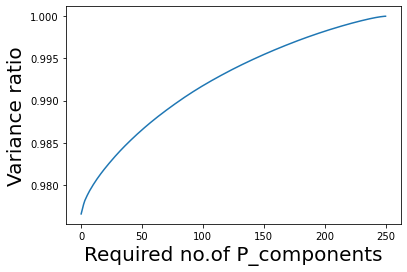

In [729]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Required no.of P_components",fontsize=20)
plt.ylabel("Variance ratio",fontsize=20)

In [730]:
np.sum(np.cumsum(pca.explained_variance_ratio_)>0.99)

170

In [731]:
# Count of variables that could explain 95% of the variance
variables=p_pca_heuristic.shape[1]-np.sum(np.cumsum(pca.explained_variance_ratio_)>0.99)
variables

81

In [732]:
# Dropping the above no.of variables

p_pca_heuristic=p_pca_heuristic.iloc[:,0:variables]
p_pca_heuristic

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-0.954096,-0.026873,-0.022766,-0.017656,0.042893,-0.009986,0.081120,-0.048116,0.018439,-0.012131,...,0.006622,-0.003232,-0.024343,-0.033918,0.012875,0.002326,0.004515,-0.009885,-0.002494,-0.007058
1,-3.954861,-0.081841,0.230028,0.004954,-0.031341,-0.012204,-0.011664,0.019165,-0.012271,0.003217,...,0.006862,0.015709,-0.014724,-0.021970,0.007102,0.025235,0.029552,-0.004098,0.055704,0.004155
2,3.046271,-0.007241,-0.011953,-0.022434,-0.034254,0.017539,0.021049,0.043686,-0.046876,-0.009208,...,-0.010380,-0.024179,-0.016234,-0.009136,0.006398,-0.002606,-0.007912,0.020450,-0.009914,-0.005829
3,-3.953926,-0.024908,-0.029632,-0.003389,-0.003897,-0.025532,0.027368,-0.006351,0.000234,-0.026174,...,0.036923,0.056560,0.072578,-0.018617,0.027768,0.024129,-0.042722,-0.101120,-0.070304,0.100268
4,-1.953698,-0.016353,-0.032114,0.002853,-0.005543,-0.031888,-0.000075,0.017439,-0.007500,-0.023209,...,-0.003780,-0.032342,0.004190,-0.005481,0.017551,-0.029191,0.025586,-0.012849,-0.010937,-0.004828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,7.046643,0.051927,0.017924,-0.024009,-0.056230,0.085720,-0.010780,-0.037860,-0.040982,-0.102237,...,-0.028932,0.033828,0.023922,-0.011113,0.049714,0.021002,-0.000321,-0.028094,0.039650,0.003301
5568,-2.954025,-0.028661,-0.016705,-0.020033,0.185572,0.133787,0.100798,-0.152989,-0.060646,0.246000,...,0.006917,-0.012698,-0.032590,-0.006947,-0.008277,-0.035134,0.005124,-0.020940,-0.009068,-0.003363
5569,-1.953973,-0.015702,-0.028164,-0.006027,-0.016225,-0.028040,-0.004178,0.003133,-0.007076,-0.018113,...,-0.004450,-0.001835,0.007518,-0.006362,-0.023537,-0.003801,0.016558,-0.015222,0.003740,0.028477
5570,5.046557,-0.015056,-0.009396,-0.004956,-0.017537,0.001389,0.039101,0.024376,-0.047070,-0.048894,...,0.011742,0.055201,-0.033326,0.037289,-0.125259,0.073455,0.032339,0.046726,0.200886,-0.012004


In [733]:
p_pca_heuristic.to_csv("PCA_Heuristic.csv",index=False)

### Visualizing the word vectors using PCA

In [734]:
# We'll reduce columns

from sklearn.decomposition import PCA
pca=PCA(n_components=2)      # 2 principal components
principalComponents=pca.fit_transform(data_final)
principalDf=pd.DataFrame(data=principalComponents,columns=['PC1','PC2'],index=p_pca_heuristic.index)

In [735]:
principalDf['Label']=corpus['Labels']
principalDf

,PC1,PC2,Label
0,-0.954096,-0.026842,ham
1,-3.954861,-0.081832,ham
2,3.046271,-0.007268,spam
3,-3.953926,-0.024859,ham
4,-1.953698,-0.016338,ham
...,...,...,...
5567,7.046643,0.051992,spam
5568,-2.954025,-0.028619,ham
5569,-1.953973,-0.015686,ham
5570,5.046557,-0.015054,ham


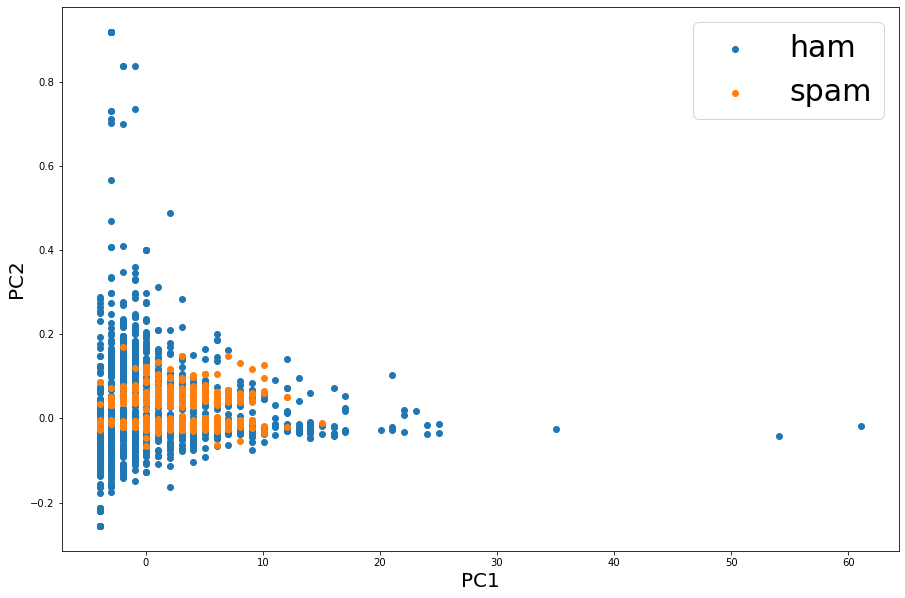

In [736]:
# Group the data by the Label
grouped = principalDf.groupby('Label')

plt.figure(figsize=(15,10))
# Plot each group as a separate scatter plot
for name, group in grouped:
    plt.scatter(group['PC1'], group['PC2'], label=name)

# Add a legend to the plot
plt.legend()

# Label the axes
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.legend(fontsize=30)
# Show the plot
plt.show()


In [739]:
p_pca_heuristic

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-0.954096,-0.026873,-0.022766,-0.017656,0.042893,-0.009986,0.081120,-0.048116,0.018439,-0.012131,...,0.006622,-0.003232,-0.024343,-0.033918,0.012875,0.002326,0.004515,-0.009885,-0.002494,-0.007058
1,-3.954861,-0.081841,0.230028,0.004954,-0.031341,-0.012204,-0.011664,0.019165,-0.012271,0.003217,...,0.006862,0.015709,-0.014724,-0.021970,0.007102,0.025235,0.029552,-0.004098,0.055704,0.004155
2,3.046271,-0.007241,-0.011953,-0.022434,-0.034254,0.017539,0.021049,0.043686,-0.046876,-0.009208,...,-0.010380,-0.024179,-0.016234,-0.009136,0.006398,-0.002606,-0.007912,0.020450,-0.009914,-0.005829
3,-3.953926,-0.024908,-0.029632,-0.003389,-0.003897,-0.025532,0.027368,-0.006351,0.000234,-0.026174,...,0.036923,0.056560,0.072578,-0.018617,0.027768,0.024129,-0.042722,-0.101120,-0.070304,0.100268
4,-1.953698,-0.016353,-0.032114,0.002853,-0.005543,-0.031888,-0.000075,0.017439,-0.007500,-0.023209,...,-0.003780,-0.032342,0.004190,-0.005481,0.017551,-0.029191,0.025586,-0.012849,-0.010937,-0.004828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,7.046643,0.051927,0.017924,-0.024009,-0.056230,0.085720,-0.010780,-0.037860,-0.040982,-0.102237,...,-0.028932,0.033828,0.023922,-0.011113,0.049714,0.021002,-0.000321,-0.028094,0.039650,0.003301
5568,-2.954025,-0.028661,-0.016705,-0.020033,0.185572,0.133787,0.100798,-0.152989,-0.060646,0.246000,...,0.006917,-0.012698,-0.032590,-0.006947,-0.008277,-0.035134,0.005124,-0.020940,-0.009068,-0.003363
5569,-1.953973,-0.015702,-0.028164,-0.006027,-0.016225,-0.028040,-0.004178,0.003133,-0.007076,-0.018113,...,-0.004450,-0.001835,0.007518,-0.006362,-0.023537,-0.003801,0.016558,-0.015222,0.003740,0.028477
5570,5.046557,-0.015056,-0.009396,-0.004956,-0.017537,0.001389,0.039101,0.024376,-0.047070,-0.048894,...,0.011742,0.055201,-0.033326,0.037289,-0.125259,0.073455,0.032339,0.046726,0.200886,-0.012004


In [741]:
data_final = pd.concat([p_pca_heuristic,corpus_binary["Labels"]],axis=1)

X = data_final.drop(["Labels"],axis=1)
y = data_final["Labels"]

In [742]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-0.954096,-0.026873,-0.022766,-0.017656,0.042893,-0.009986,0.081120,-0.048116,0.018439,-0.012131,...,0.006622,-0.003232,-0.024343,-0.033918,0.012875,0.002326,0.004515,-0.009885,-0.002494,-0.007058
1,-3.954861,-0.081841,0.230028,0.004954,-0.031341,-0.012204,-0.011664,0.019165,-0.012271,0.003217,...,0.006862,0.015709,-0.014724,-0.021970,0.007102,0.025235,0.029552,-0.004098,0.055704,0.004155


In [743]:
#Splitting the data TRAIN TEST

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [744]:
#models with default parameter

lr_1 = LogisticRegression()
rf_1 = RandomForestClassifier()               #random forest
ab_1 = AdaBoostClassifier()                   #adaboost
gb_1 = GradientBoostingClassifier()           #gradientboost
xgb_1 = XGBClassifier()                       #xgboost classifier
knn_1 = KNeighborsClassifier()                #knn classifier
ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
svm_1 = SVC()                                 #support vector machines_classifier
#mnb_1 = MultinomialNB()                       #multinomial naive bayes - Cannot be applied to PCA due to negative values
bnb_1 = BernoulliNB()                         #bernoulli naive bayes

#### <u> Model performance with Default parameters

In [745]:
# default model performance on test data
import time
start = time.time()

L = [lr_1,rf_1,ab_1,gb_1,xgb_1,knn_1,ldm_1,svm_1,bnb_1] # List of models

acc_1 = []
f_1 = []
auroc_1 = []
recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    acc = mat.accuracy_score(y_test,pred)
    acc_1.append(acc)
    
    f1 = mat.f1_score(y_test,pred)
    f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_test,pred)
    auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_test,pred)
    recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":acc_1,"f1_score":f_1,"auroc":auroc_1,"recall_score":recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","XtraGradientBoosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier",
                                    "BernoulliNaiveBayes"])
df1_def_model
#df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

________________________________________
timetaken: 0.42271424531936647 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.932735,0.675325,0.759675,0.523490
RandomForest,0.974888,0.896296,0.906040,0.812081
AdaptiveBoosting,0.970404,0.887372,0.928995,0.872483
Gradient_Boosting,0.972197,0.890459,0.918678,0.845638
XtraGradientBoosting,0.973991,0.897527,0.922551,0.852349
KNeighourestNeighbour,0.921076,0.730061,0.869308,0.798658
LinearDiscriminantClassifier,0.947085,0.782288,0.847423,0.711409
SupportVectorclassifier,0.881614,0.204819,0.557047,0.114094
BernoulliNaiveBayes,0.945291,0.782918,0.857740,0.738255


In [ ]:
# IN PCA data, the performance of the model in terms of F1 score was not to that extent as expected by us.. But accuracy remained
# on the higher side

## Conclusions

* <b> For the TF based approach almost all the models performed well and gave better test result (Both Accuracy and F1 score).
* <b> For PCA based data the performance remained better.
* <b> For the TFIDF based approach the AUROC of the original unscaled data was good but on PCA data the AUROC scores found reducing. This can be also seen from visualization plot of first two principal components.
* <b> Doc2Vec approach performed better for all the models in both the unscaled as well as the PCA data. PCA plot also suggested good classification of labels.
Heuristic approach resulted in great accuracy but the expected F1 score was not upto the mark. This approach has some future scopes to be further worked on.